# **1. Perkenalan Dataset**


# Customer Personality Clustering and Classification

Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Workflow
1. Cluster unlabeled dataset using Agglomerative Clustering 
2. Add label based on the clustering result
3. Export the dataset (clustered.csv)
4. Train and test clustering model based on labeled dataset using Decission Tree and Naive Bayes

Features: 
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


# **2. Import Library**

Pada tahap ini,kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
!pip install yellowbrick

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering 
from sklearn.metrics import silhouette_score 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [213]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**
Pada langkah ini, kita akan melakukan eksplorasi data guna memahami lebih dalam karakteristik dan struktur dari dataset yang telah diimpor.

## 1. Memahami Struktur Data

   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [215]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [216]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [217]:
print("Jumlah baris duplikat: ", df.duplicated().sum())

Jumlah baris duplikat:  0


## 2. Menangani Data yang Hilang

In [218]:
#Drop semua baris yamg memiliki missing data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [219]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 1. Menghapus kolom ID karena bukan merupakan fitur

In [220]:
df = df.drop(columns='ID')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### 2.  Mendapatkan data usia pelanggan

In [221]:
df['Age'] = 2024 - df['Year_Birth']
df = df.drop(columns='Year_Birth')

### 3. Membuat kolom baru 'Spending' untuk melihat total uang yang dikeluarkan pelanggan di semua produk

In [223]:
df['Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

### 4. Membuat kolom baru 'Accept_Offer' untuk melihat frekuensi total pelanggan menerima tawaran

In [224]:
df['Accept_Offer'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

### 5. Membuat kolom baru 'Num_Purchase' untuk melihat total frekuensi belanja

In [225]:
df['Num_Purchase'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

### 6. Mengganti nama kolom NumWebVisitsMonth

In [226]:
df.rename(columns={'NumWebVisitsMonth': 'Web_Visit'}, inplace=True)

### 7. Menyeragamkan value untuk Education

In [227]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [228]:
df['Education'] = df['Education'].replace({
    'Graduation':'Bachelor',
    '2n Cycle':'Master'
})
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

### 8. Menyeragamkan value untuk Marital_Status

In [229]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [230]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd':'Single',
    'Alone':'Single',
    'YOLO':'Single',
    'Together':'Relationship'
})
df['Marital_Status'].unique()

array(['Single', 'Relationship', 'Married', 'Divorced', 'Widow'],
      dtype=object)

### 9. Membuat kolom baru untuk melihat pelanggan sudah berapa lama berlangganan

In [231]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2216 non-null   object        
 1   Marital_Status       2216 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2216 non-null   int64         
 4   Teenhome             2216 non-null   int64         
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-null   i

In [232]:
max_date = df['Dt_Customer'].max()

df['Enrolled_Days'] = (max_date - df['Dt_Customer']).dt.days
df = df.drop(columns='Dt_Customer')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days
0,Bachelor,Single,58138.0,0,0,58,635,88,546,172,...,0,0,3,11,1,67,1617,1,25,663
1,Bachelor,Single,46344.0,1,1,38,11,1,6,2,...,0,0,3,11,0,70,27,0,6,113
2,Bachelor,Relationship,71613.0,0,0,26,426,49,127,111,...,0,0,3,11,0,59,776,0,21,312
3,Bachelor,Relationship,26646.0,1,0,26,11,4,20,10,...,0,0,3,11,0,40,53,0,8,139
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,3,11,0,43,422,0,19,161


### 10. Membuat kolom baru untuk melihat total anak dari pelanggan

In [233]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns=['Kidhome', 'Teenhome'])
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,0,3,11,1,67,1617,1,25,663,0
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,0,3,11,0,70,27,0,6,113,2
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,0,3,11,0,59,776,0,21,312,0
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,0,3,11,0,40,53,0,8,139,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,3,11,0,43,422,0,19,161,1


### 11. Drop baris yang memiliki data Income dan umur tidak wajar 

In [235]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,...,0.009477,3.0,11.0,0.150271,55.179603,607.075361,0.448556,14.880866,353.521209,0.947202
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,...,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.892440,7.670957,202.434667,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,3.0,11.0,0.000000,47.000000,69.000000,0.000000,8.000000,180.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,...,0.000000,3.0,11.0,0.000000,54.000000,396.500000,0.000000,15.000000,355.500000,1.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,3.0,11.0,0.000000,65.000000,1048.000000,1.000000,21.000000,529.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,3.0,11.0,1.000000,131.000000,2525.000000,5.000000,44.000000,699.000000,3.000000


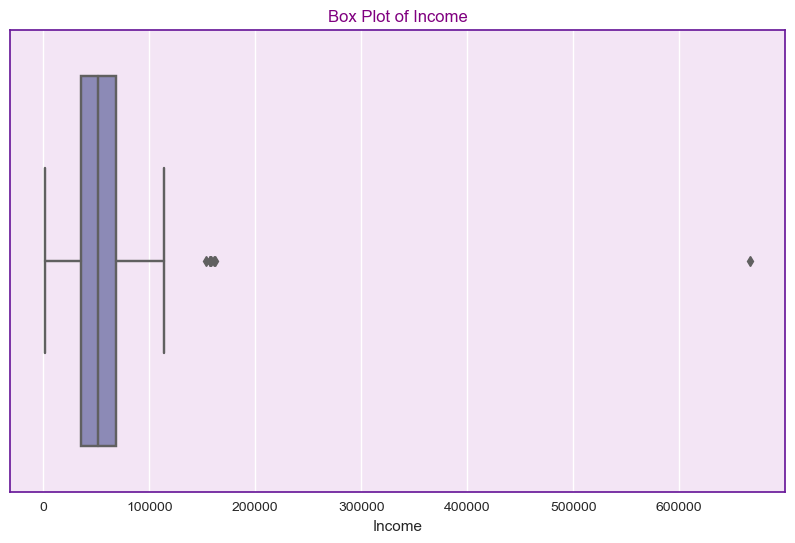

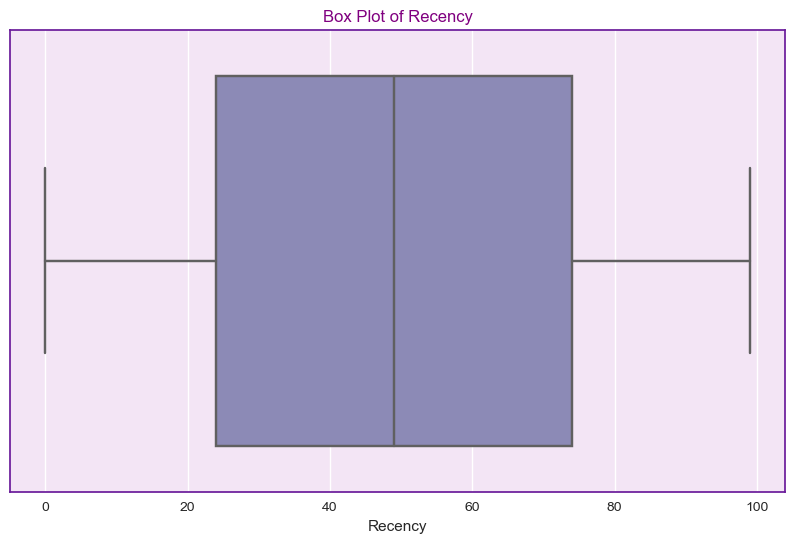

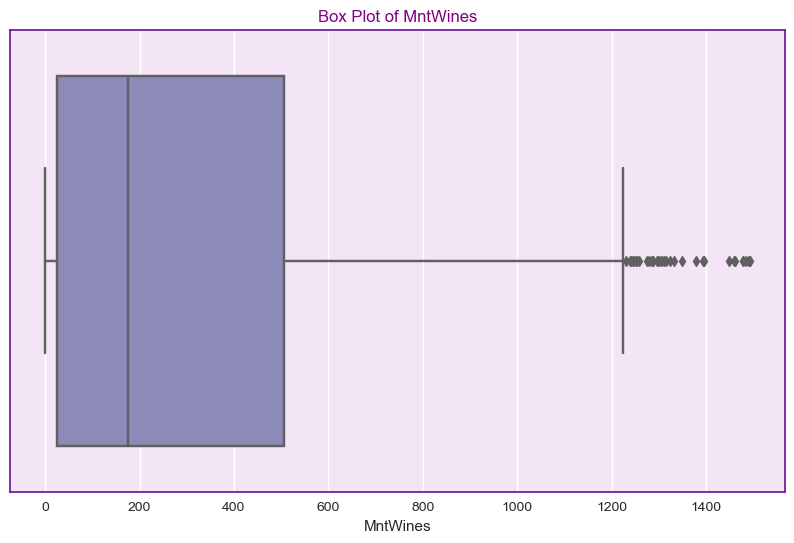

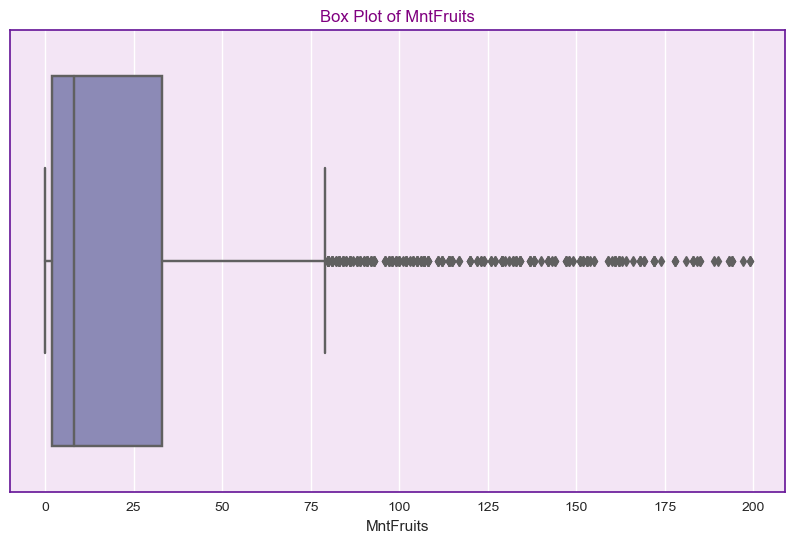

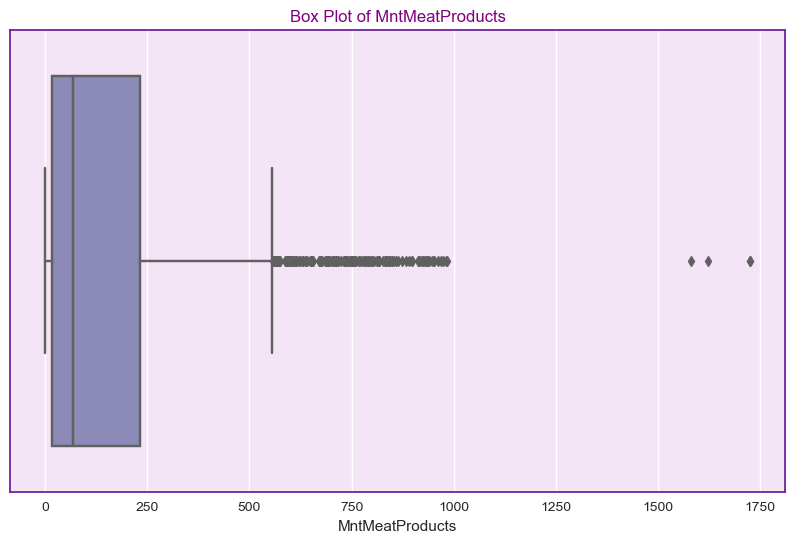

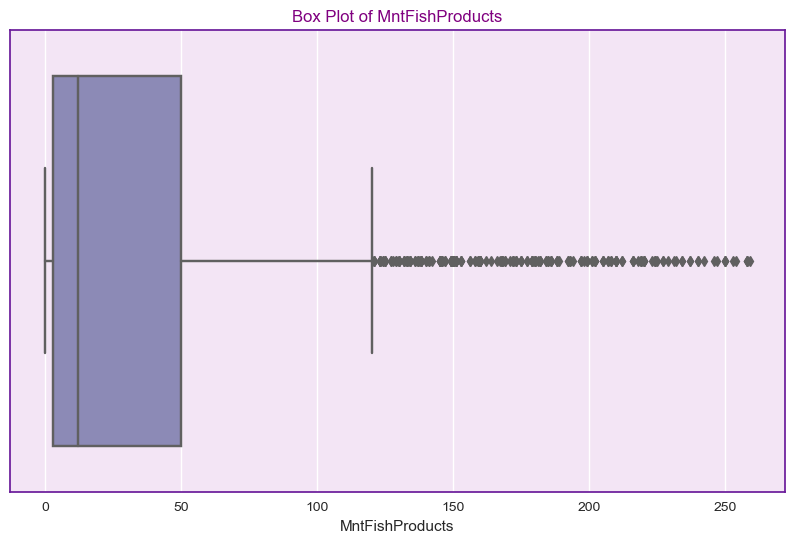

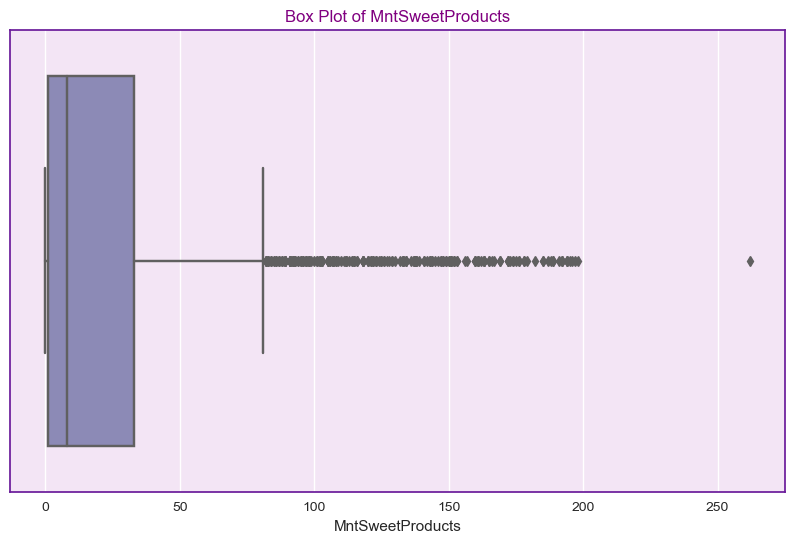

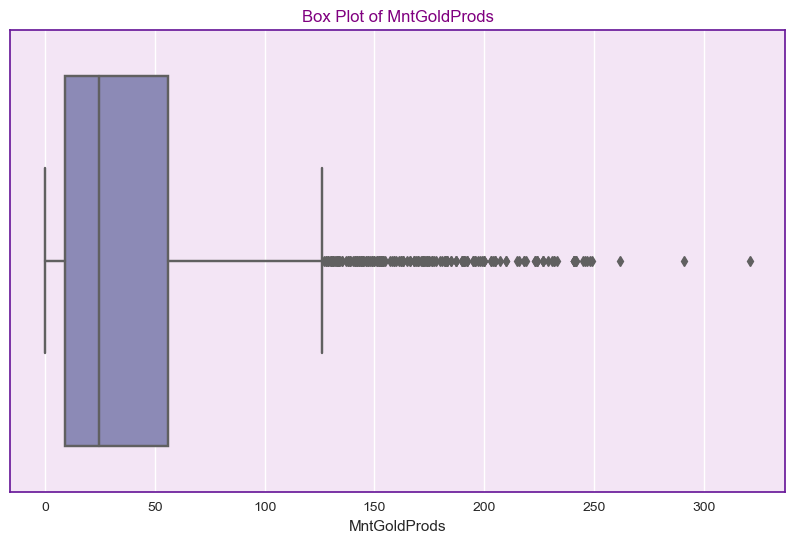

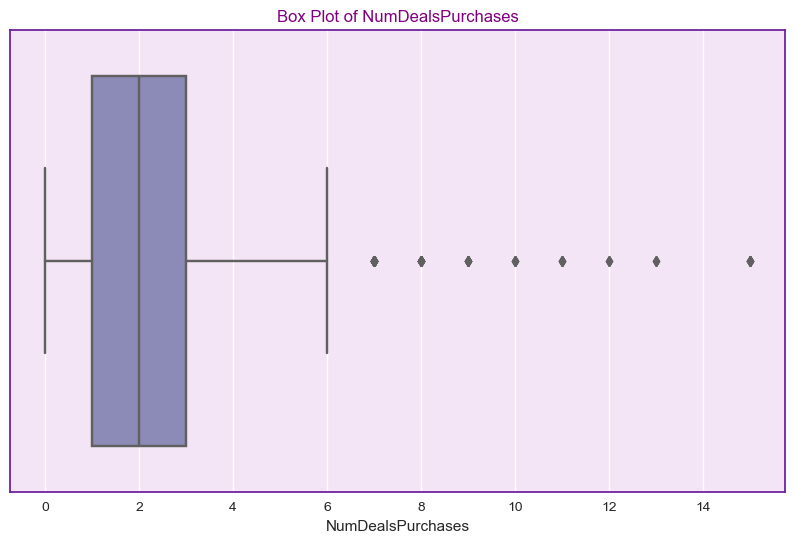

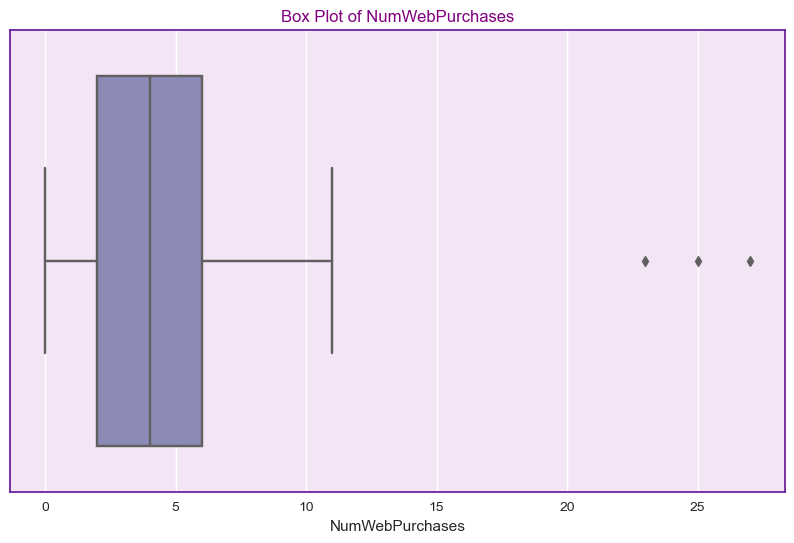

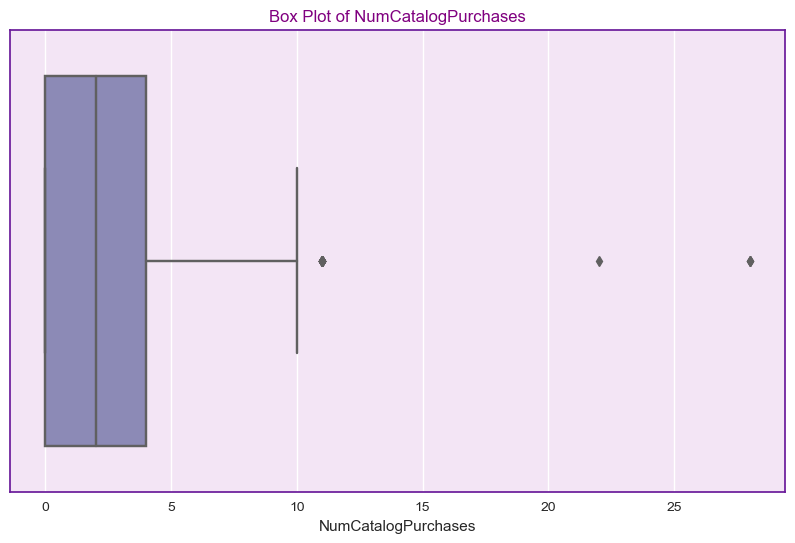

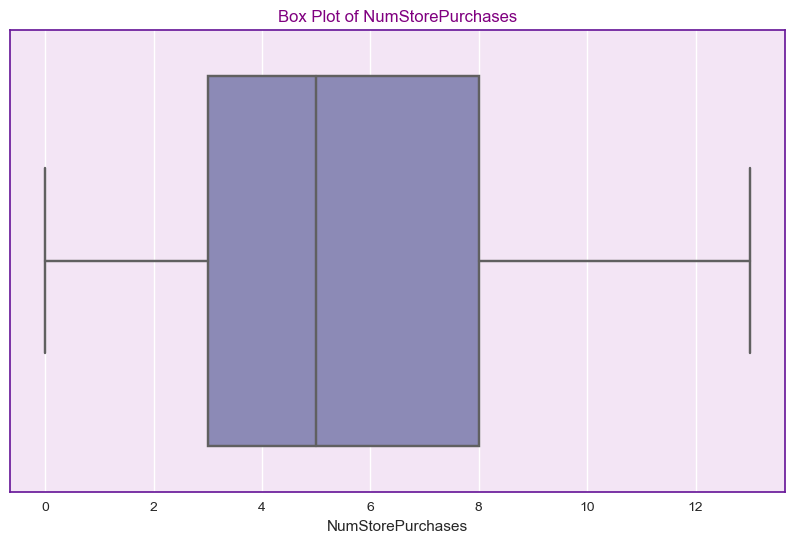

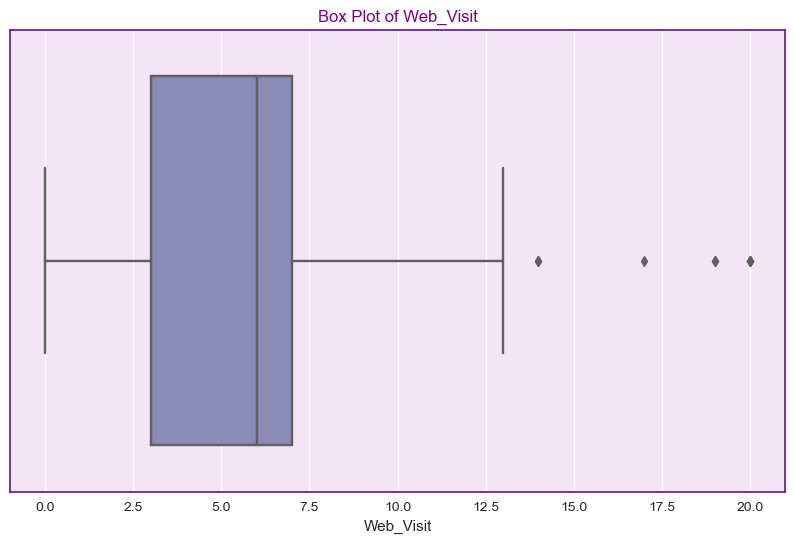

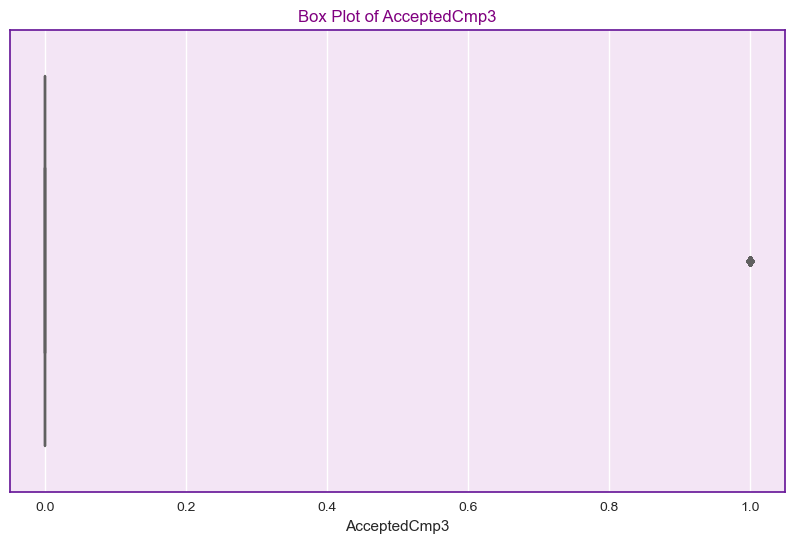

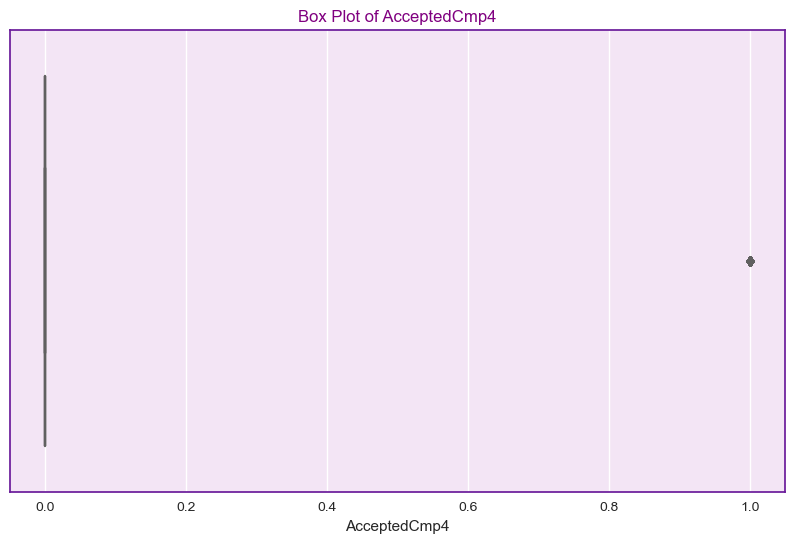

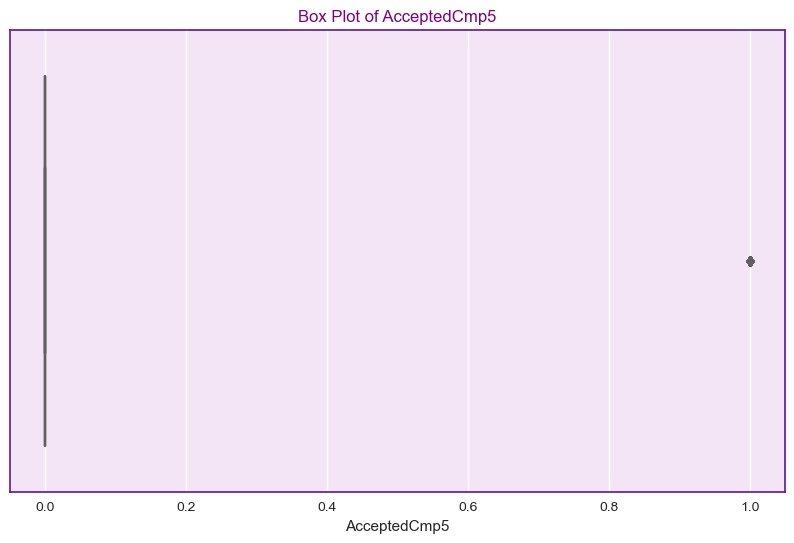

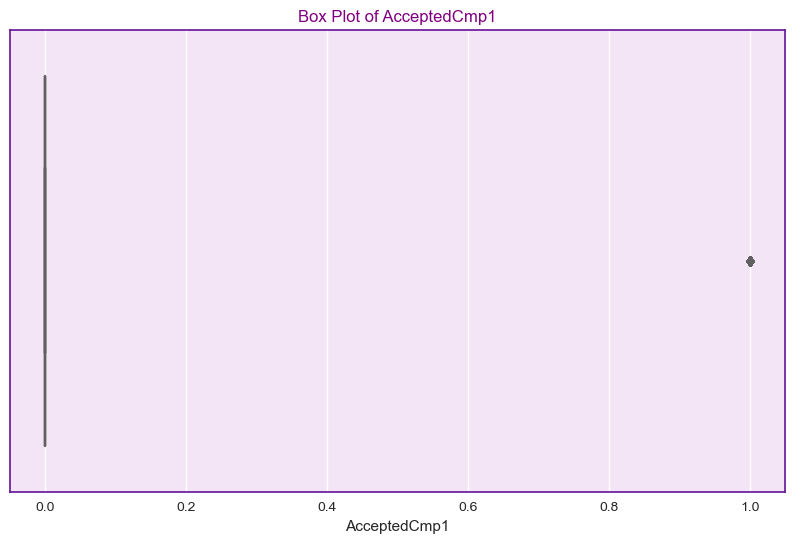

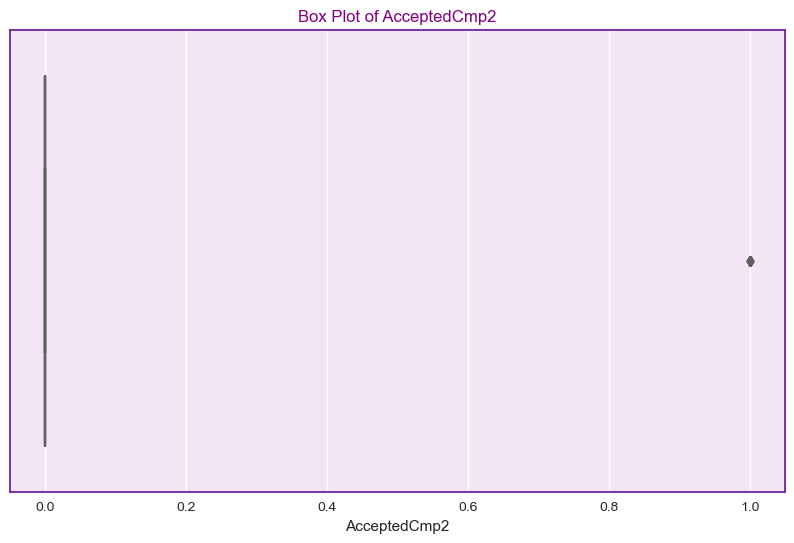

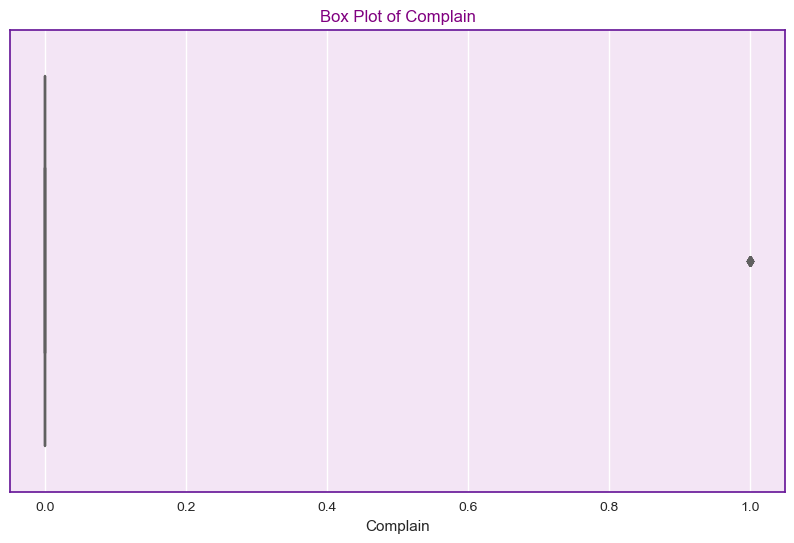

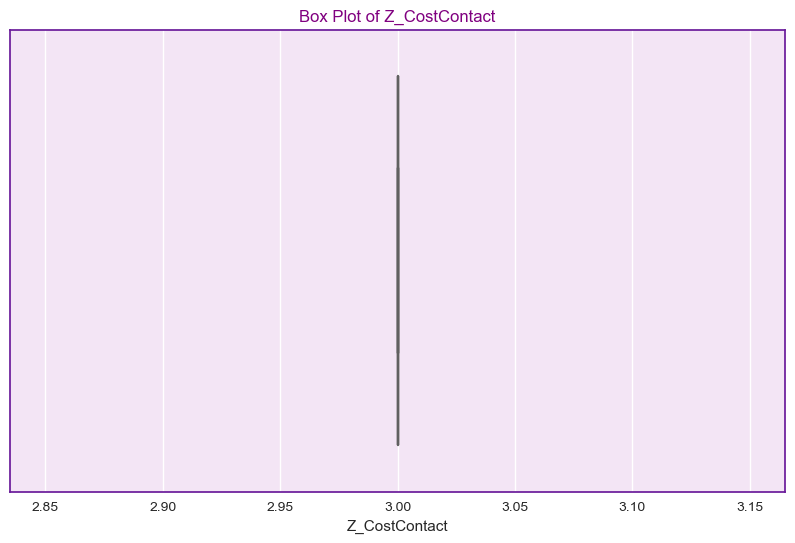

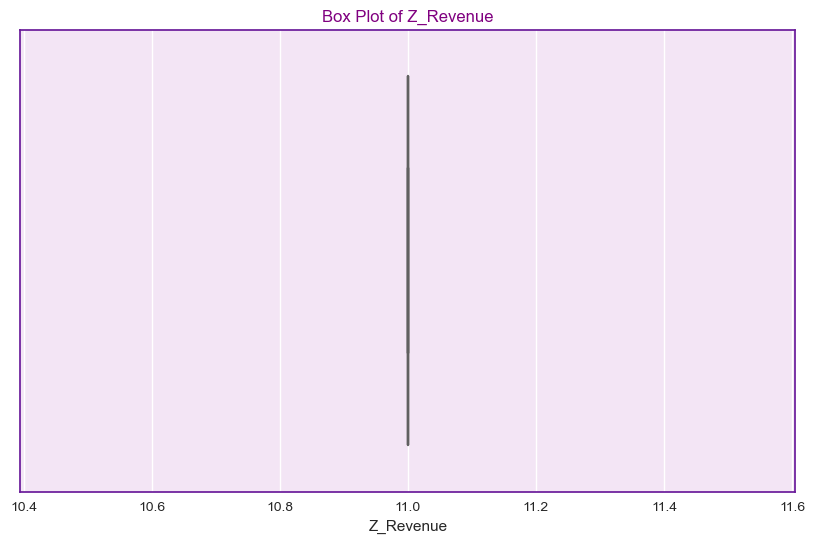

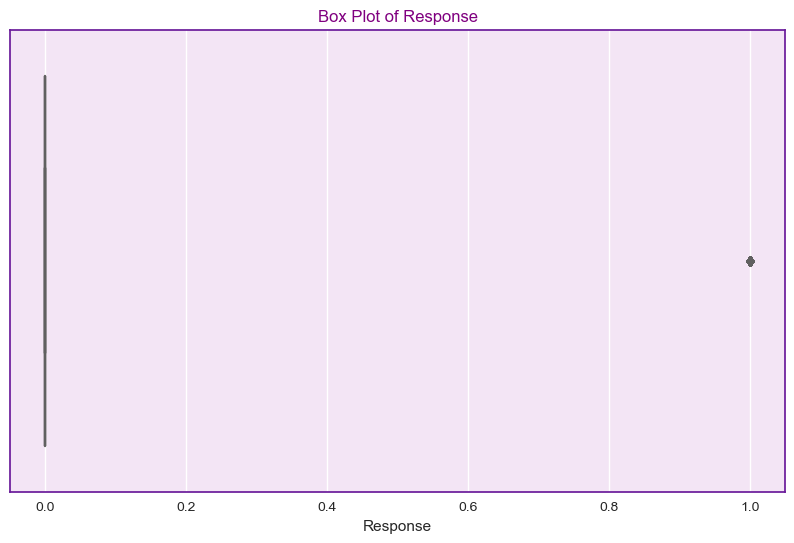

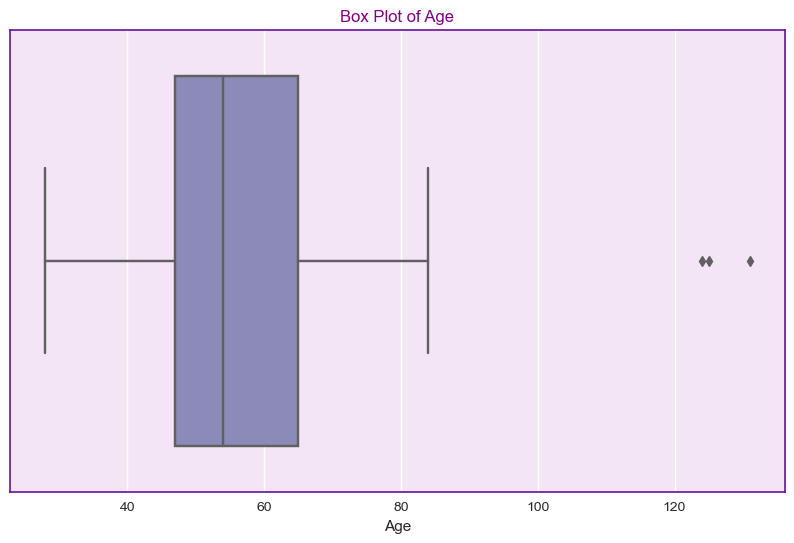

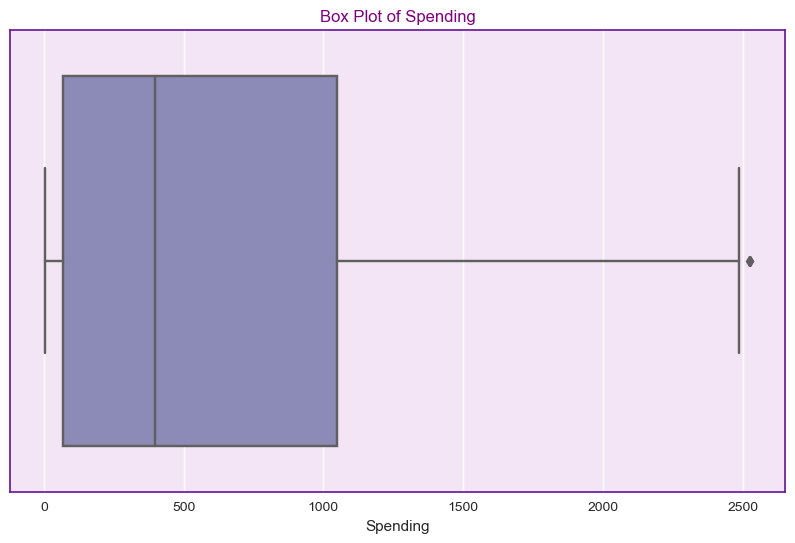

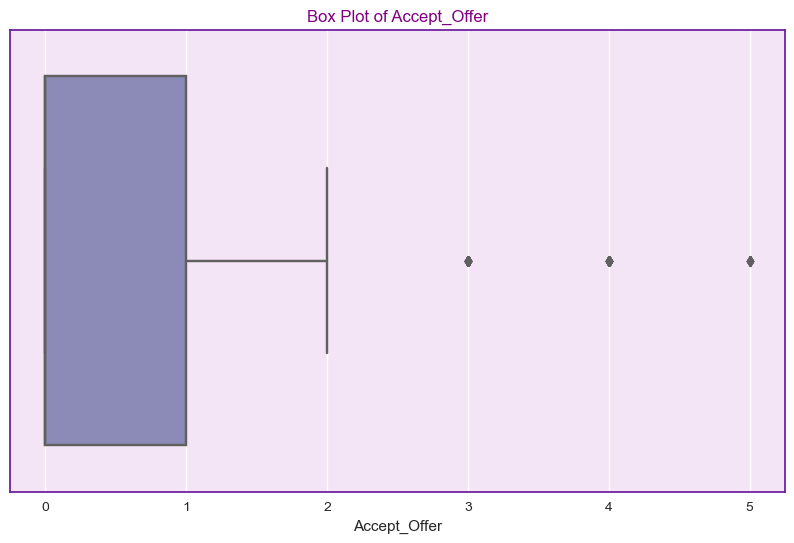

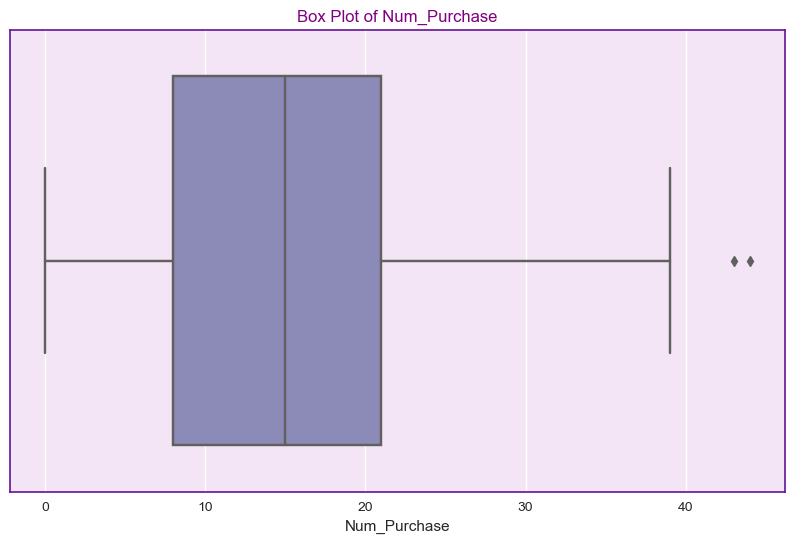

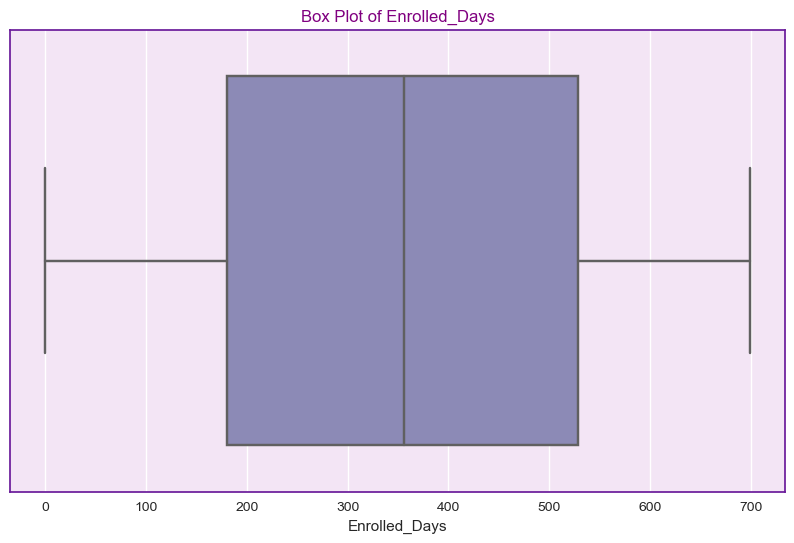

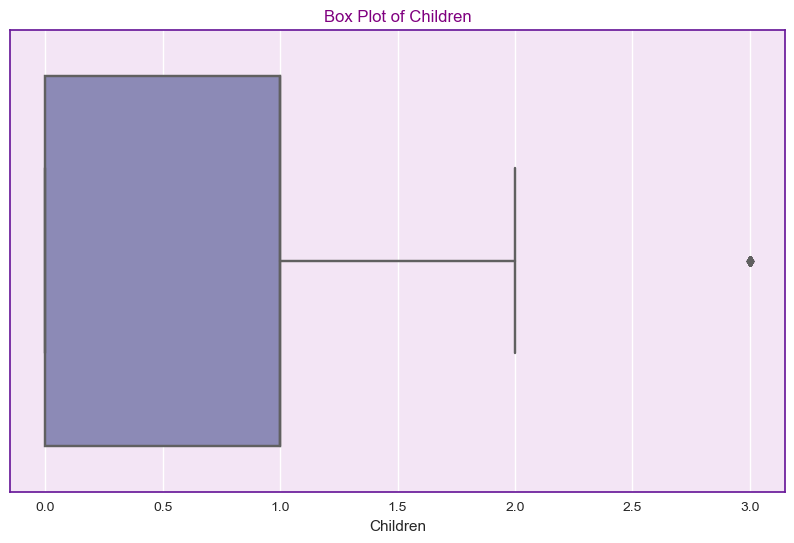

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df.select_dtypes(include=["number"]).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], color=sns.color_palette("Purples", as_cmap=True)(0.6))
    plt.title(f'Box Plot of {feature}', color='purple')
    plt.show()


In [237]:
df = df.drop(df[(df['Income'] > 140000) | (df['Age'] > 100)].index)

In [238]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,...,0.009070,3.0,11.0,0.15102,55.095692,606.821769,0.450340,14.887982,353.718367,0.948753
std,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,...,0.094827,0.0,0.0,0.35815,11.705801,601.675284,0.894075,7.615277,202.563647,0.749231
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.00000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,3.0,11.0,0.00000,47.000000,69.000000,0.000000,8.000000,180.000000,0.000000
50%,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,...,0.000000,3.0,11.0,0.00000,54.000000,397.000000,0.000000,15.000000,356.000000,1.000000
75%,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,...,0.000000,3.0,11.0,0.00000,65.000000,1047.000000,1.000000,21.000000,529.000000,1.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,3.0,11.0,1.00000,84.000000,2525.000000,5.000000,43.000000,699.000000,3.000000


### 12. Dataset final setelah cleaning dan preprocessing

In [239]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,0,3,11,1,67,1617,1,25,663,0
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,0,3,11,0,70,27,0,6,113,2
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,0,3,11,0,59,776,0,21,312,0
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,0,3,11,0,40,53,0,8,139,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,3,11,0,43,422,0,19,161,1


## 3.Visualisasi Data

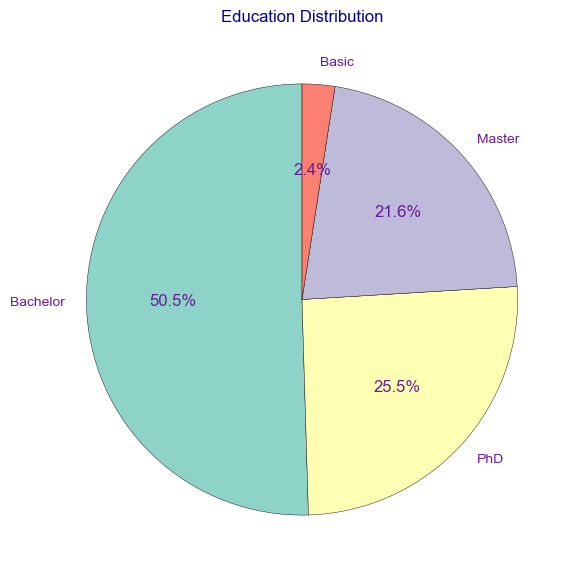

In [240]:
# Menggunakan palet warna-warni dari matplotlib
colors = plt.get_cmap('Set3').colors  # Bisa ganti dengan 'tab10', 'Spectral', dsb.

plt.figure(figsize=(7, 7))
plt.pie(df['Education'].value_counts(), 
        labels=['Bachelor', 'PhD', 'Master', 'Basic'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,  # Menggunakan warna-warni
        wedgeprops={'edgecolor': 'black'})  # Tambahkan outline agar lebih jelas

plt.title('Education Distribution', color='darkblue')  # Warna judul disesuaikan agar tetap enak dilihat
plt.show()

In [241]:
total_spending_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spending_per_product.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
total_spending_per_product = total_spending_per_product.sort_values(ascending=False)
total_spending_per_product

Wines     675093
Meat      364513
Gold       97146
Fish       83253
Sweet      59818
Fruits     58219
dtype: int64

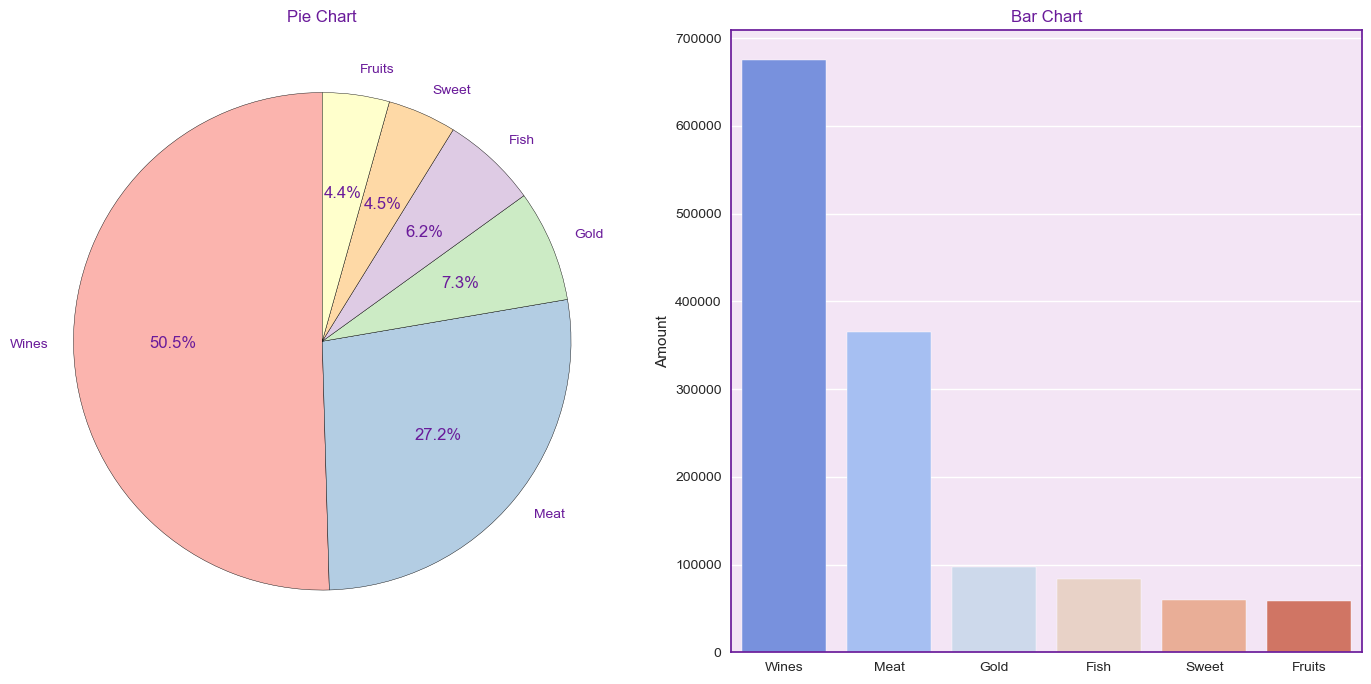

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Menghitung total pengeluaran per kategori produk
total_spending_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spending_per_product.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
total_spending_per_product = total_spending_per_product.sort_values(ascending=False)

# Konversi ke DataFrame agar seaborn dapat menangani dengan benar
df_plot = total_spending_per_product.reset_index()
df_plot.columns = ['Product', 'Amount']

# Membuat plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart dengan warna cerah
colors = plt.get_cmap('Pastel1').colors  # Warna lebih soft dan menarik
ax1.pie(df_plot['Amount'], labels=df_plot['Product'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Pie Chart')

# Bar Chart dengan warna lebih cerah
sns.barplot(x='Product', y='Amount', data=df_plot, palette='coolwarm', ax=ax2)  # Menggunakan coolwarm agar lebih eye-catching
ax2.set_ylabel('Amount')
ax2.set_xlabel(None)
ax2.set_title('Bar Chart')

plt.tight_layout()
plt.show()



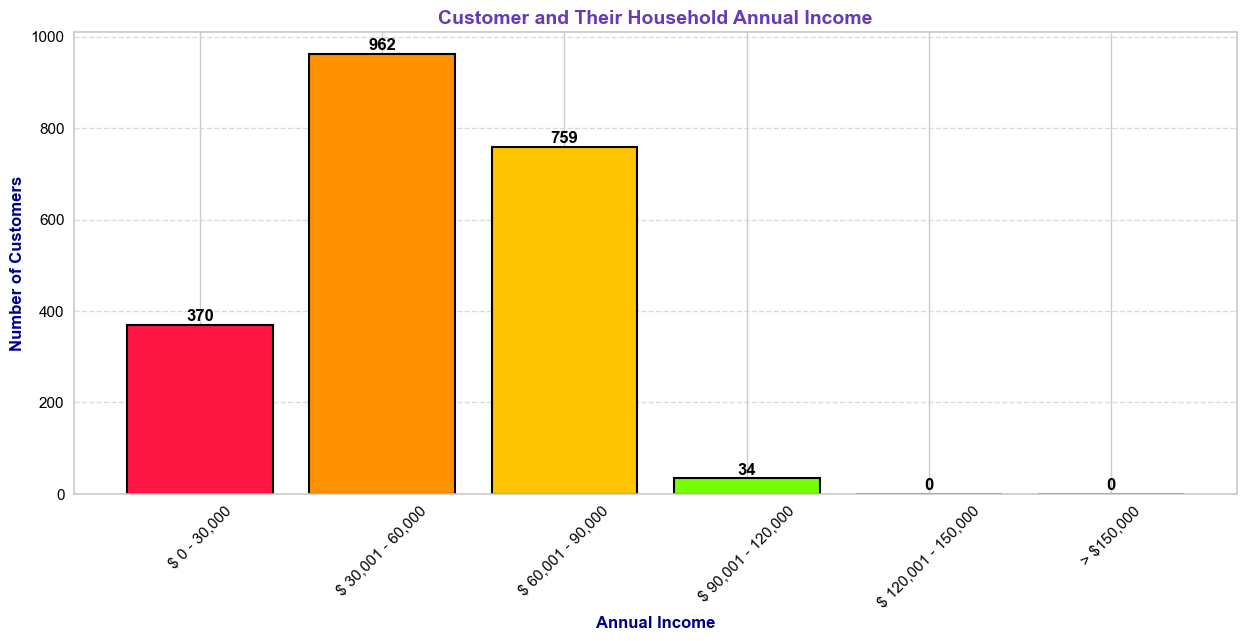

In [166]:
import matplotlib.pyplot as plt

# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30000)]
ai31_60 = df["Income"][(df["Income"] >= 31000) & (df["Income"] <= 60000)]
ai61_90 = df["Income"][(df["Income"] >= 61000) & (df["Income"] <= 90000)]
ai91_120 = df["Income"][(df["Income"] >= 91000) & (df["Income"] <= 120000)]
ai121_150 = df["Income"][(df["Income"] >= 121000) & (df["Income"] <= 150000)]
ai150 = df["Income"][(df["Income"] > 150000)]

# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000", "> $150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values), len(ai150.values)]

# Warna neon yang lebih menyala
neon_colors = ['#FF1744', '#FF9100', '#FFC400', '#76FF03', '#00E5FF', '#D500F9']

# Membuat bar chart dengan warna menyala
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=neon_colors, edgecolor='black', linewidth=1.5)
plt.title("Customer and Their Household Annual Income", fontsize=14, fontweight='bold', color='#673AB7')  # Warna ungu mencolok
plt.xlabel("Annual Income", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Number of Customers", fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=11, color='black')  
plt.yticks(fontsize=11, color='black')

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
    plt.text(i, aiy[i] + 2, str(aiy[i]), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid untuk memperjelas
plt.show()


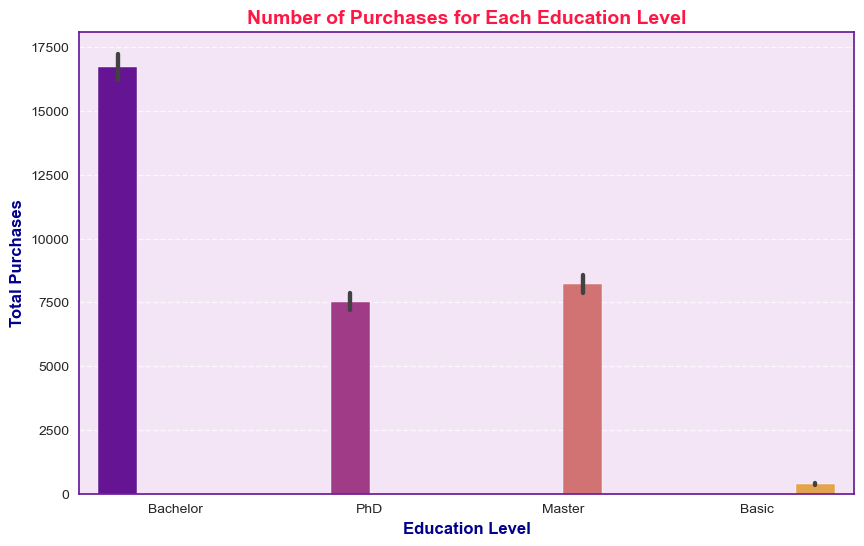

In [243]:


import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Num_Purchase', data=df, estimator=sum, palette='plasma', hue="Education")

# Hilangkan legenda jika tidak diperlukan
plt.legend().remove()

# Tambahkan judul dan label dengan warna mencolok
plt.title("Number of Purchases for Each Education Level", fontsize=14, fontweight='bold', color='#FF1744')  # Merah terang
plt.xlabel("Education Level", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Total Purchases", fontsize=12, fontweight='bold', color='darkblue')

# Perjelas grid horizontal agar lebih terbaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()


# **5. Data Preprocessing**
Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

In [244]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Web_Visit', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Spending',
       'Accept_Offer', 'Num_Purchase', 'Enrolled_Days', 'Children'],
      dtype='object')

In [245]:
category_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int','float']).columns

df[category_features]

,Education,Marital_Status
0,Bachelor,Single
1,Bachelor,Single
2,Bachelor,Relationship
3,Bachelor,Relationship
4,PhD,Married
...,...,...
2235,Bachelor,Married
2236,PhD,Relationship
2237,Bachelor,Divorced
2238,Master,Relationship


In [246]:
X = pd.get_dummies(df, columns=category_features)
X

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Relationship,Marital_Status_Single,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,True,False,False,False,False,False,False,True,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,True,False,False,False,False,False,False,True,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,True,False,False,False,False,False,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,1,True,False,False,False,False,False,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,1,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,1,True,False,False,False,False,True,False,False,False
2236,64014.0,56,406,0,30,0,0,8,7,8,...,3,False,False,False,True,False,False,True,False,False
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,True,False,False,False,True,False,False,False,False
2238,69245.0,8,428,30,214,80,30,61,2,6,...,1,False,False,True,False,False,False,True,False,False


In [247]:
numeric_features = X.select_dtypes(include=["number"]).columns

scaler = StandardScaler()
X_scaled = X
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Relationship,Marital_Status_Single,Marital_Status_Widow
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,...,-1.266589,True,False,False,False,False,False,False,True,False
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,...,1.403420,True,False,False,False,False,False,False,True,False
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,...,-1.266589,True,False,False,False,False,False,True,False,False
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,...,0.068415,True,False,False,False,False,False,True,False,False
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,...,0.068415,False,False,False,True,False,True,False,False,False


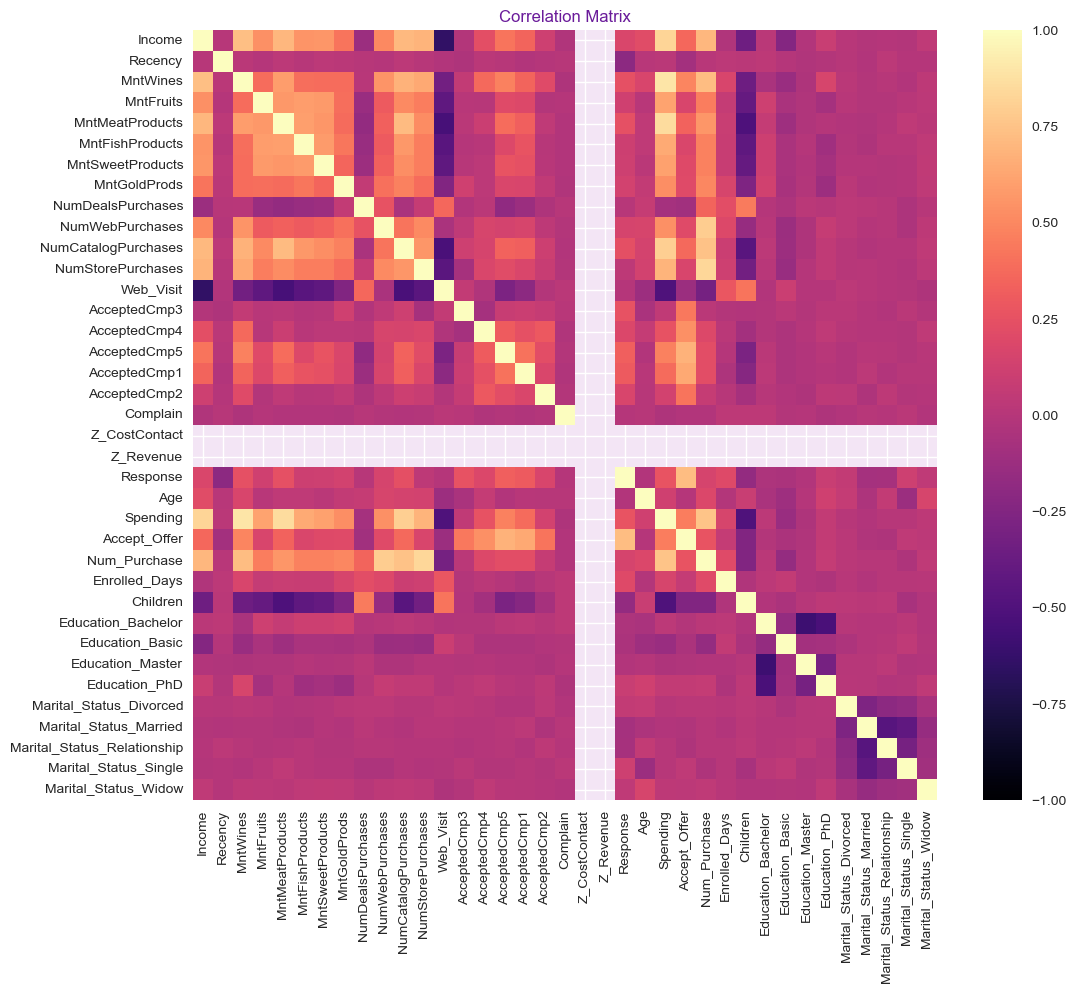

In [248]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 10))
correlation_matrix = X_scaled.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [249]:
X_scaled = X_scaled.drop(columns=['Recency','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact', 'Z_Revenue', 'Response'])

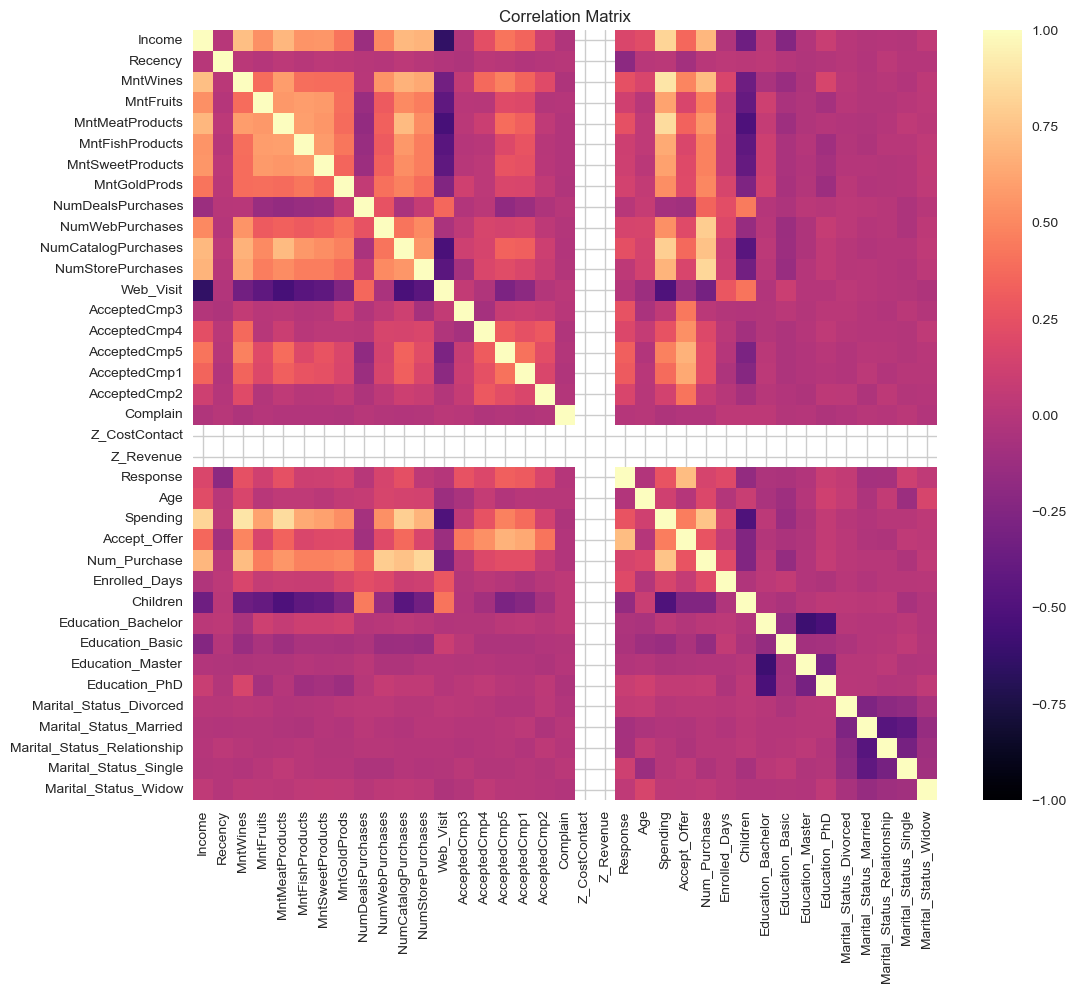

In [177]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_scaled.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [250]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2205 non-null   float64
 1   Web_Visit                    2205 non-null   float64
 2   Complain                     2205 non-null   float64
 3   Age                          2205 non-null   float64
 4   Spending                     2205 non-null   float64
 5   Accept_Offer                 2205 non-null   float64
 6   Num_Purchase                 2205 non-null   float64
 7   Enrolled_Days                2205 non-null   float64
 8   Children                     2205 non-null   float64
 9   Education_Bachelor           2205 non-null   bool   
 10  Education_Basic              2205 non-null   bool   
 11  Education_Master             2205 non-null   bool   
 12  Education_PhD                2205 non-null   bool   
 13  Marital_Status_Divorced

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**
Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai yakni  model KMeans  untuk mengelompokkan data berdasarkan kesamaan.

In [251]:
X_scaled.columns

Index(['Income', 'Web_Visit', 'Complain', 'Age', 'Spending', 'Accept_Offer',
       'Num_Purchase', 'Enrolled_Days', 'Children', 'Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Relationship', 'Marital_Status_Single',
       'Marital_Status_Widow'],
      dtype='object')

In [252]:
selected = ['Income', 'Spending', 'Num_Purchase', 'Accept_Offer']

In [253]:
k = 3

In [254]:
AC = AgglomerativeClustering(n_clusters=k)
# fit model and predict clusters
pred = AC.fit_predict(X_scaled[selected])
score = silhouette_score(X_scaled[selected], AC.labels_)
print(f'k={k}, Silhouette Score: {score}')

df_clustered = df.copy()
df_clustered['Cluster'] = pred

k=3, Silhouette Score: 0.4409596049207569


In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled[selected])
df_pca = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

In [256]:
AC = AgglomerativeClustering(n_clusters=k)
# fit model and predict clusters
pred = AC.fit_predict(df_pca)
score = silhouette_score(df_pca, AC.labels_)
print(f'k={k}, Silhouette Score: {score}')

df_clustered = df.copy()
df_clustered['Cluster'] = pred + 1
df_pca['Cluster'] = pred + 1

k=3, Silhouette Score: 0.5679359240208132


In [257]:
df_clustered

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,3,11,1,67,1617,1,25,663,0,2
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,3,11,0,70,27,0,6,113,2,1
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,3,11,0,59,776,0,21,312,0,2
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,3,11,0,40,53,0,8,139,1,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,3,11,0,43,422,0,19,161,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Bachelor,Married,61223.0,46,709,43,182,42,118,247,...,3,11,0,57,1341,0,18,381,1,2
2236,PhD,Relationship,64014.0,56,406,0,30,0,0,8,...,3,11,0,78,444,1,22,19,3,2
2237,Bachelor,Divorced,56981.0,91,908,48,217,32,12,24,...,3,11,0,43,1241,1,19,155,0,2
2238,Master,Relationship,69245.0,8,428,30,214,80,30,61,...,3,11,0,68,843,0,23,156,1,2


## **b. Evaluasi Model Clustering**
Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

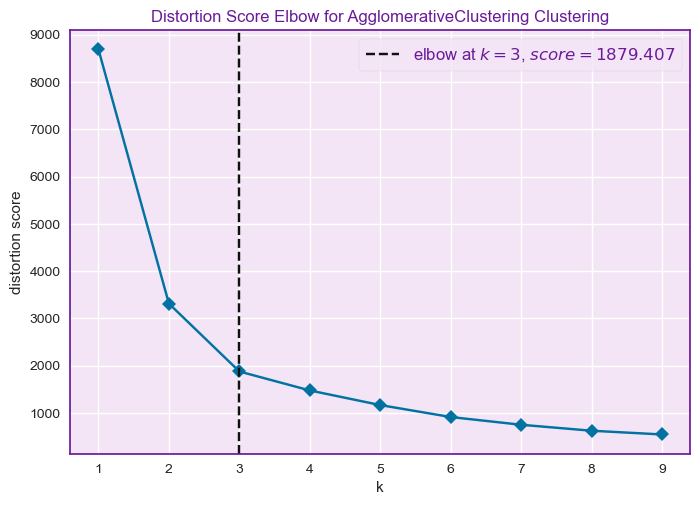

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

sns.set_style("darkgrid")
plt.rcParams.update({'axes.facecolor': '#f3e5f5',  # Latar belakang ungu pastel
                     'axes.edgecolor': '#6a1b9a',  # Pinggiran ungu tua
                     'text.color': '#6a1b9a'})  # Warna teks

# Inisialisasi model AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=3)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(AC, k=(1, 10), timings=False)

# Fit visualizer dengan data
visualizer.fit(df_pca)

# Menampilkan grafik elbow dengan skema warna ungu
visualizer.show()


## **d. Visualisasi Hasil Clustering**

In [259]:
import plotly.express as px

cluster_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD700']  # Bisa disesuaikan

# Scatter plot 3D dengan warna yang lebih menyala
fig = px.scatter_3d(df_clustered, 
                     x="Income", 
                     y="Num_Purchase", 
                     z="Spending", 
                     color='Cluster', 
                     color_discrete_sequence=cluster_colors,  # Warna mencolok
                     width=800, 
                     height=800)

# Menampilkan plot
fig.show()


In [260]:
fig = px.scatter(df_pca, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### - Distribusi Kolom Numerik

In [261]:
df_clustered[df_clustered['Cluster']==1].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,...,1207.0,1207.0,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.0
mean,36488.717481,48.515327,68.164043,6.891466,31.952775,10.136703,6.748136,21.077051,2.268434,2.628003,...,3.0,11.0,0.104391,53.425021,144.970174,0.207954,9.274234,334.732394,1.213753,1.0
std,12800.387061,29.131791,88.456891,12.628405,36.688080,18.465567,12.133770,30.311154,1.580097,1.976221,...,0.0,0.0,0.305894,11.142562,143.603814,0.499422,4.444445,201.121179,0.695193,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,27208.000000,24.000000,10.000000,1.000000,9.000000,2.000000,1.000000,5.000000,1.000000,1.000000,...,3.0,11.0,0.000000,46.000000,43.000000,0.000000,6.000000,154.000000,1.000000,1.0
50%,36736.000000,49.000000,29.000000,3.000000,18.000000,4.000000,3.000000,12.000000,2.000000,2.000000,...,3.0,11.0,0.000000,52.000000,78.000000,0.000000,8.000000,326.000000,1.000000,1.0
75%,45863.000000,74.000000,96.500000,7.000000,43.000000,11.000000,8.000000,25.500000,3.000000,3.000000,...,3.0,11.0,0.000000,61.000000,218.500000,0.000000,12.000000,502.000000,2.000000,1.0
max,71322.000000,99.000000,691.000000,151.000000,270.000000,179.000000,157.000000,321.000000,15.000000,25.000000,...,3.0,11.0,1.000000,84.000000,835.000000,3.000000,25.000000,699.000000,3.000000,1.0


In [262]:
df_clustered[df_clustered['Cluster']==2].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,...,841.0,841.0,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.0
mean,67879.845422,50.380499,539.640904,48.843044,300.523187,69.116528,49.894174,70.598098,2.582640,5.895363,...,3.0,11.0,0.102259,57.694411,1078.615933,0.330559,21.717004,375.865636,0.699168,2.0
std,10848.238322,28.414874,262.520610,47.081228,221.360576,64.222887,48.823682,57.327486,2.273163,2.499712,...,0.0,0.0,0.303169,11.593331,403.173147,0.550005,4.503788,203.175076,0.685643,0.0
min,2447.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,29.000000,277.000000,0.000000,10.000000,0.000000,0.000000,2.0
25%,60597.000000,27.000000,347.000000,12.000000,132.000000,17.000000,12.000000,28.000000,1.000000,4.000000,...,3.0,11.0,0.000000,49.000000,777.000000,0.000000,19.000000,209.000000,0.000000,2.0
50%,67546.000000,52.000000,499.000000,33.000000,235.000000,50.000000,33.000000,53.000000,2.000000,6.000000,...,3.0,11.0,0.000000,58.000000,1029.000000,0.000000,22.000000,395.000000,1.000000,2.0
75%,75702.000000,73.000000,708.000000,74.000000,419.000000,104.000000,76.000000,100.000000,3.000000,8.000000,...,3.0,11.0,0.000000,67.000000,1336.000000,1.000000,25.000000,551.000000,1.000000,2.0
max,113734.000000,99.000000,1449.000000,199.000000,1725.000000,259.000000,262.000000,249.000000,15.000000,27.000000,...,3.0,11.0,1.000000,83.000000,2525.000000,2.000000,43.000000,698.000000,3.000000,2.0


In [263]:
df_clustered[df_clustered['Cluster']==3].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,...,157.0,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,80878.261146,45.458599,885.229299,56.203822,466.280255,82.108280,61.859873,78.55414,1.286624,5.808917,...,3.0,11.0,0.770701,54.019108,1630.235669,2.955414,21.464968,381.044586,0.248408,3.0
std,10137.546690,29.885999,328.704155,51.376531,261.768121,66.607786,52.013245,62.73718,1.291247,2.224957,...,0.0,0.0,0.421727,13.900042,418.854836,0.942881,4.315340,196.313765,0.538945,0.0
min,48192.000000,0.000000,152.000000,0.000000,45.000000,0.000000,0.000000,0.00000,0.000000,2.000000,...,3.0,11.0,0.000000,29.000000,416.000000,2.000000,12.000000,6.000000,0.000000,3.0
25%,75261.000000,19.000000,693.000000,21.000000,265.000000,31.000000,24.000000,33.00000,1.000000,4.000000,...,3.0,11.0,1.000000,42.000000,1379.000000,2.000000,18.000000,218.000000,0.000000,3.0
50%,81574.000000,40.000000,934.000000,35.000000,449.000000,59.000000,43.000000,56.00000,1.000000,5.000000,...,3.0,11.0,1.000000,53.000000,1676.000000,3.000000,21.000000,403.000000,0.000000,3.0
75%,87679.000000,71.000000,1092.000000,80.000000,687.000000,120.000000,95.000000,119.00000,1.000000,7.000000,...,3.0,11.0,1.000000,66.000000,1919.000000,4.000000,25.000000,557.000000,0.000000,3.0
max,105471.000000,99.000000,1493.000000,190.000000,974.000000,250.000000,194.000000,245.00000,11.000000,11.000000,...,3.0,11.0,1.000000,80.000000,2525.000000,5.000000,34.000000,697.000000,3.000000,3.0


### - Sebaran Income tiap Cluster

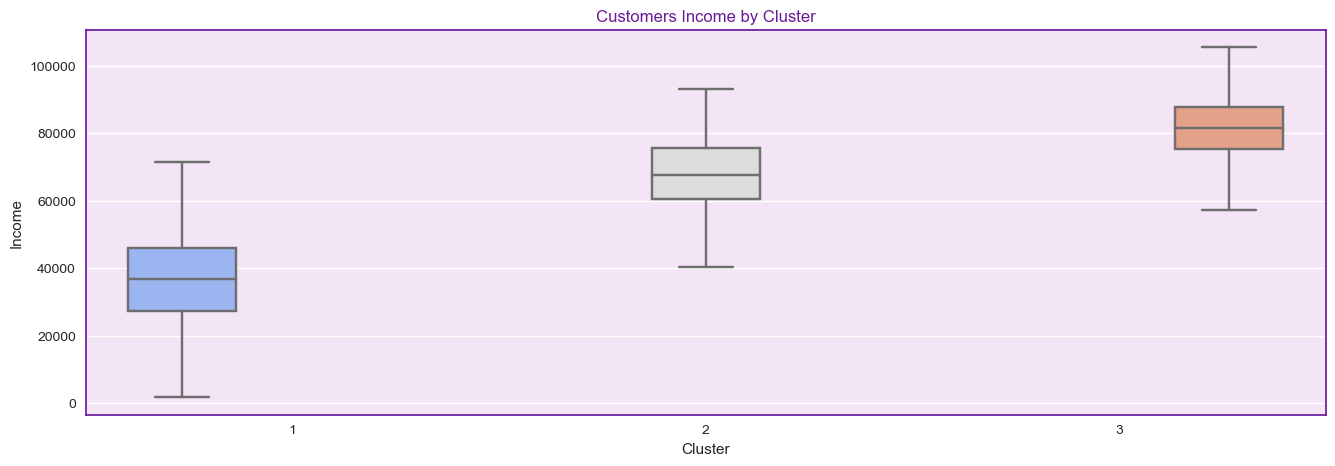

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(16,5))

# Menambahkan judul
plt.title('Customers Income by Cluster')

# Membuat boxplot dengan warna yang lebih mencolok
ax = sns.boxplot(data=df_clustered, 
                 x='Cluster', 
                 y='Income', 
                 hue='Cluster', 
                 palette='coolwarm',  # Warna lebih mencolok dan kontras
                 showfliers=False)

# Menghilangkan legenda jika tidak diperlukan
plt.legend().remove()

# Menampilkan plot
plt.show()



### - Sebaran Spending tiap Cluster

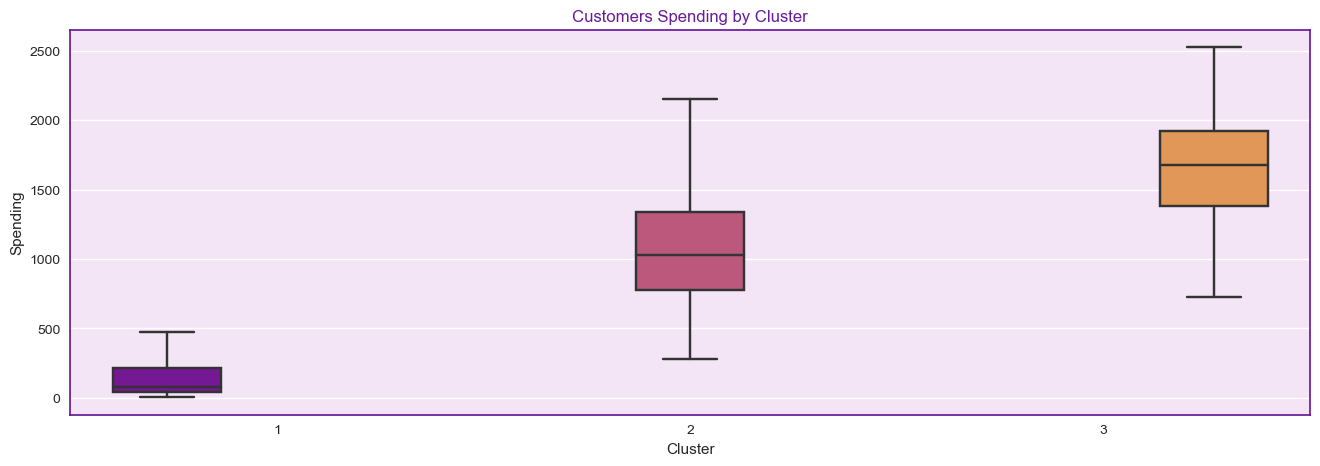

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(16,5))

# Menambahkan judul
plt.title('Customers Spending by Cluster')

# Membuat boxplot dengan warna yang lebih mencolok
ax = sns.boxplot(data=df_clustered, 
                 x='Cluster', 
                 y='Spending', 
                 hue='Cluster', 
                 palette='plasma',  # Warna lebih terang & mencolok
                 showfliers=False)

# Menghilangkan legenda jika tidak diperlukan
ax.legend_.remove()

# Menampilkan plot
plt.show()


### - Sebaran Jumlah Pembelian tiap Cluster

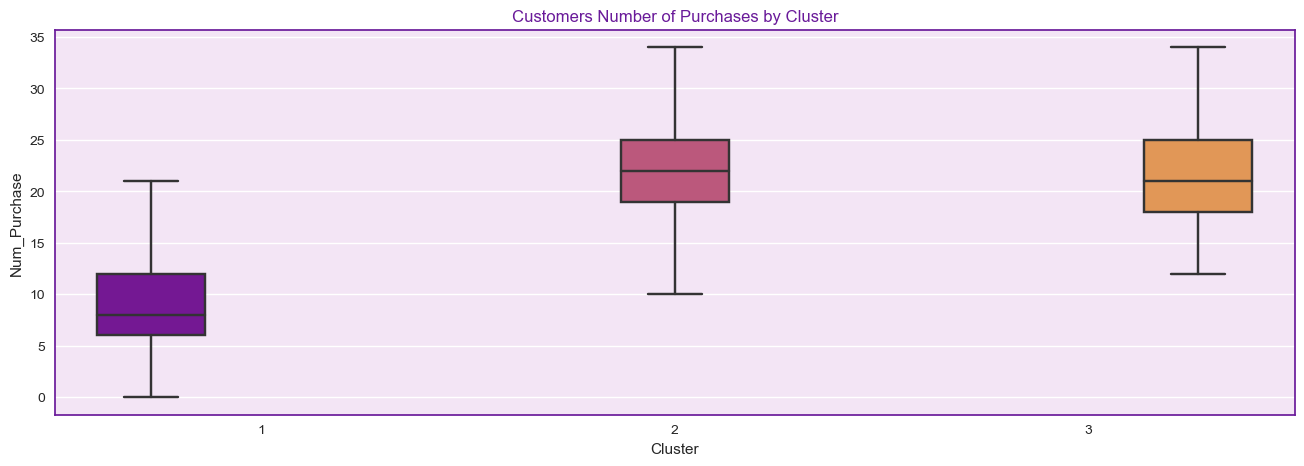

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(16,5))

# Menambahkan judul
plt.title('Customers Number of Purchases by Cluster')

# Membuat boxplot dengan warna yang lebih mencolok
ax = sns.boxplot(data=df_clustered, 
                 x='Cluster', 
                 y='Num_Purchase', 
                 hue='Cluster', 
                 palette='plasma',  # Warna lebih terang dan mencolok
                 showfliers=False)

# Menghilangkan legend jika tidak diperlukan
if ax.legend_:
    ax.legend_.remove()

# Menampilkan plot
plt.show()


### - Sebaran Jumlah Anak tiap Cluster

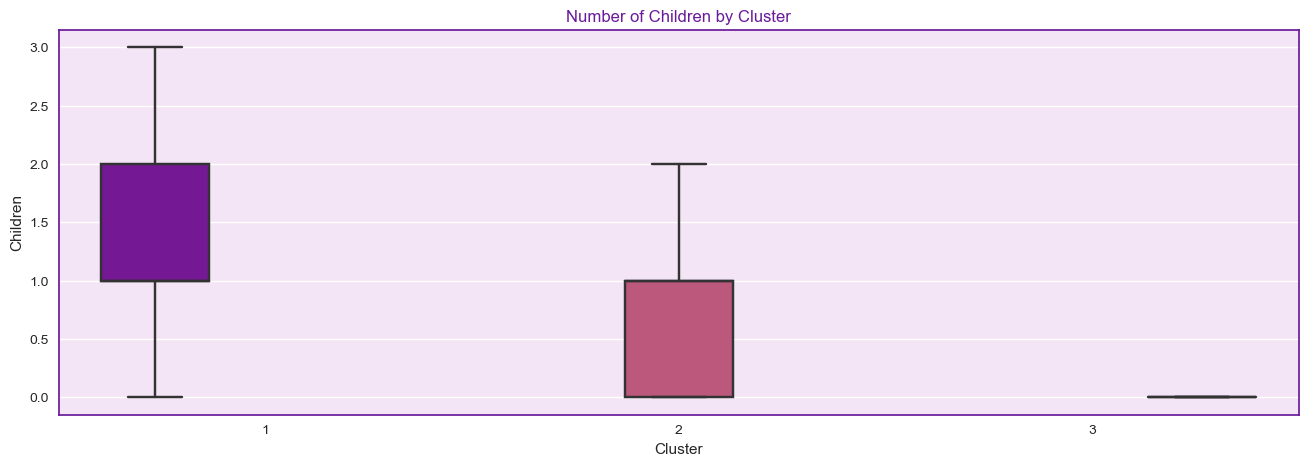

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(16,5))

# Menambahkan judul
plt.title('Number of Children by Cluster')

# Membuat boxplot dengan warna mencolok
ax = sns.boxplot(data=df_clustered, 
                 x='Cluster', 
                 y='Children', 
                 hue='Cluster', 
                 palette='plasma',  # Warna lebih cerah dan kontras
                 showfliers=False)

# Menghilangkan legend jika tidak diperlukan
if ax.legend_:
    ax.legend_.remove()

# Menampilkan plot
plt.show()


### - Jumlah Website Diakses tiap Cluster

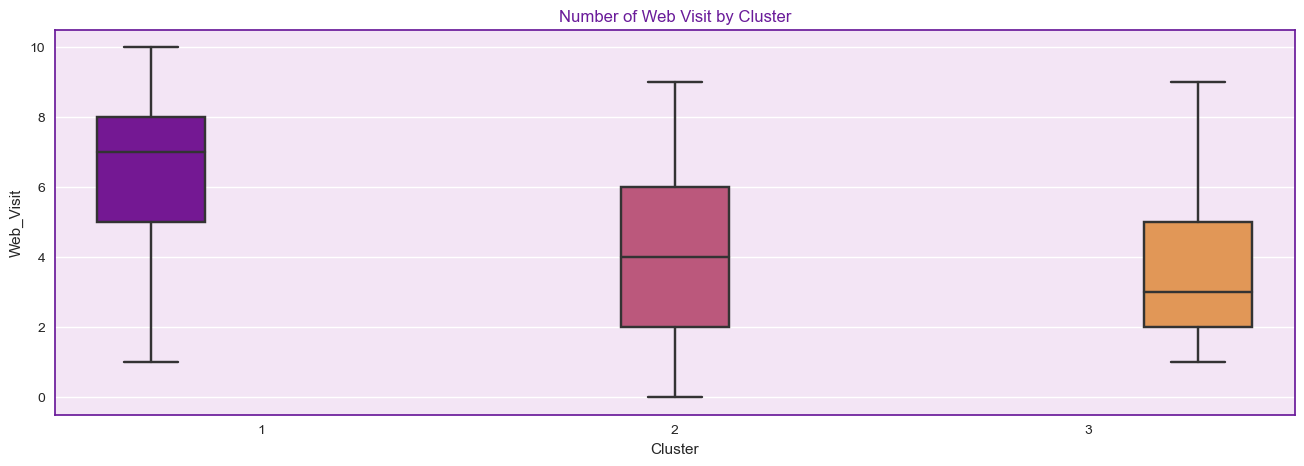

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(16,5))

# Menambahkan judul
plt.title('Number of Web Visit by Cluster')

# Membuat boxplot dengan warna lebih cerah
ax = sns.boxplot(data=df_clustered, 
                 x='Cluster', 
                 y='Web_Visit', 
                 hue='Cluster', 
                 palette='plasma',  # Warna lebih mencolok
                 showfliers=False)

# Menghilangkan legend jika tidak diperlukan
if ax.legend_:
    ax.legend_.remove()

# Menampilkan plot
plt.show()



### - Perbandingan Education tiap Cluster

In [269]:
df_cluster1 = df_clustered[df_clustered["Cluster"]==1]
df_cluster2 = df_clustered[df_clustered["Cluster"]==2]
df_cluster3 = df_clustered[df_clustered["Cluster"]==3]

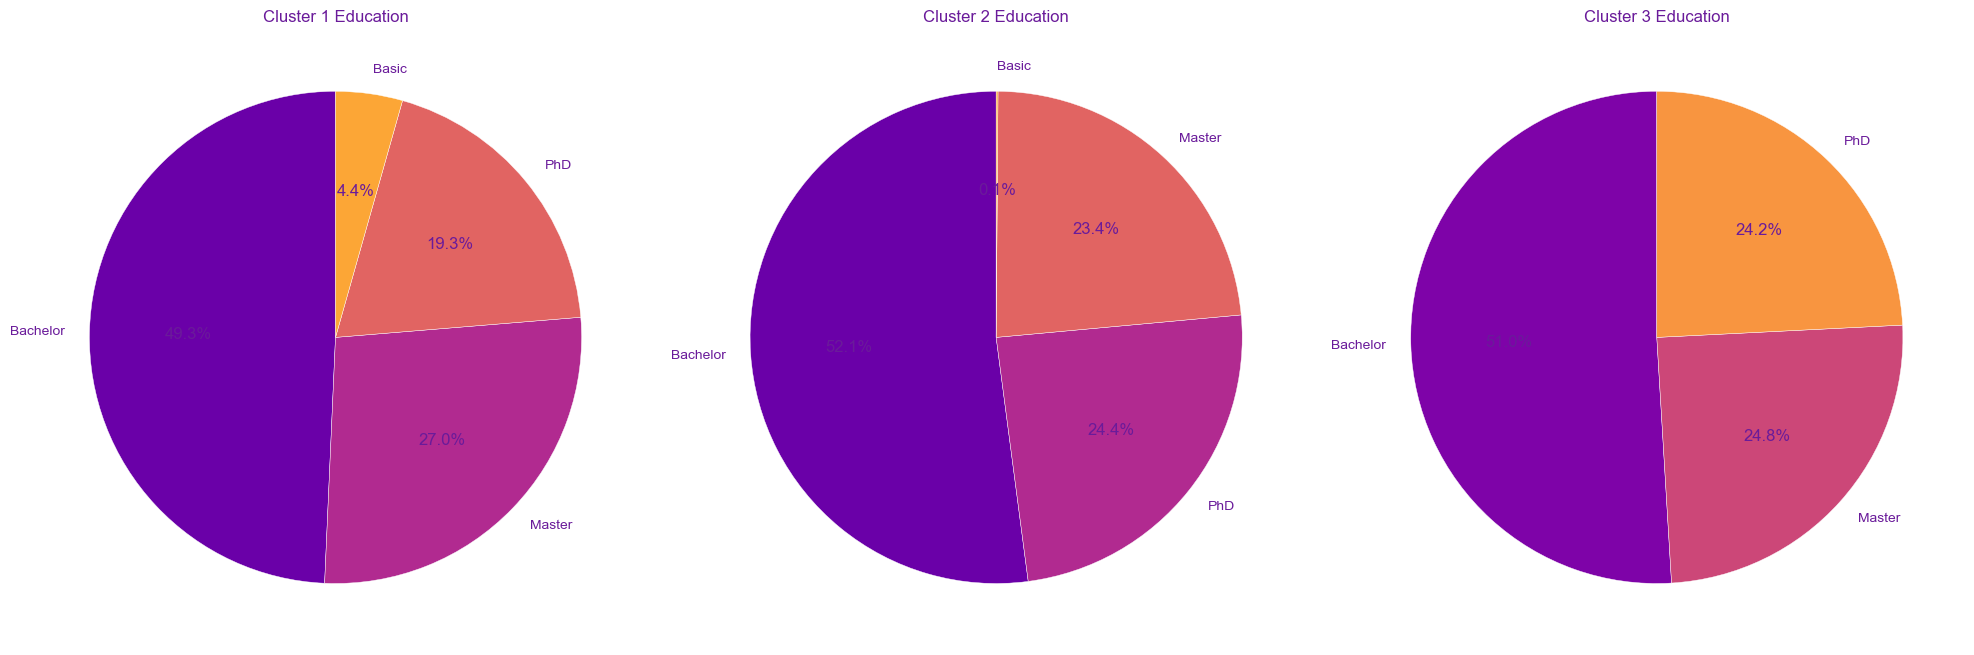

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

# Pilihan warna yang lebih mencolok
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD700', '#00FFFF']

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    cluster_counts = cluster_df['Education'].value_counts()
    ax.pie(cluster_counts, 
           labels=cluster_counts.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=sns.color_palette("plasma", len(cluster_counts)))  # Warna lebih mencolok
    ax.set_title(f'Cluster {i+1} Education')

plt.tight_layout()

# Matikan sumbu yang tidak terpakai jika jumlah cluster lebih sedikit dari jumlah subplot
if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()



### - Perbandingan Marital Status tiap Cluster

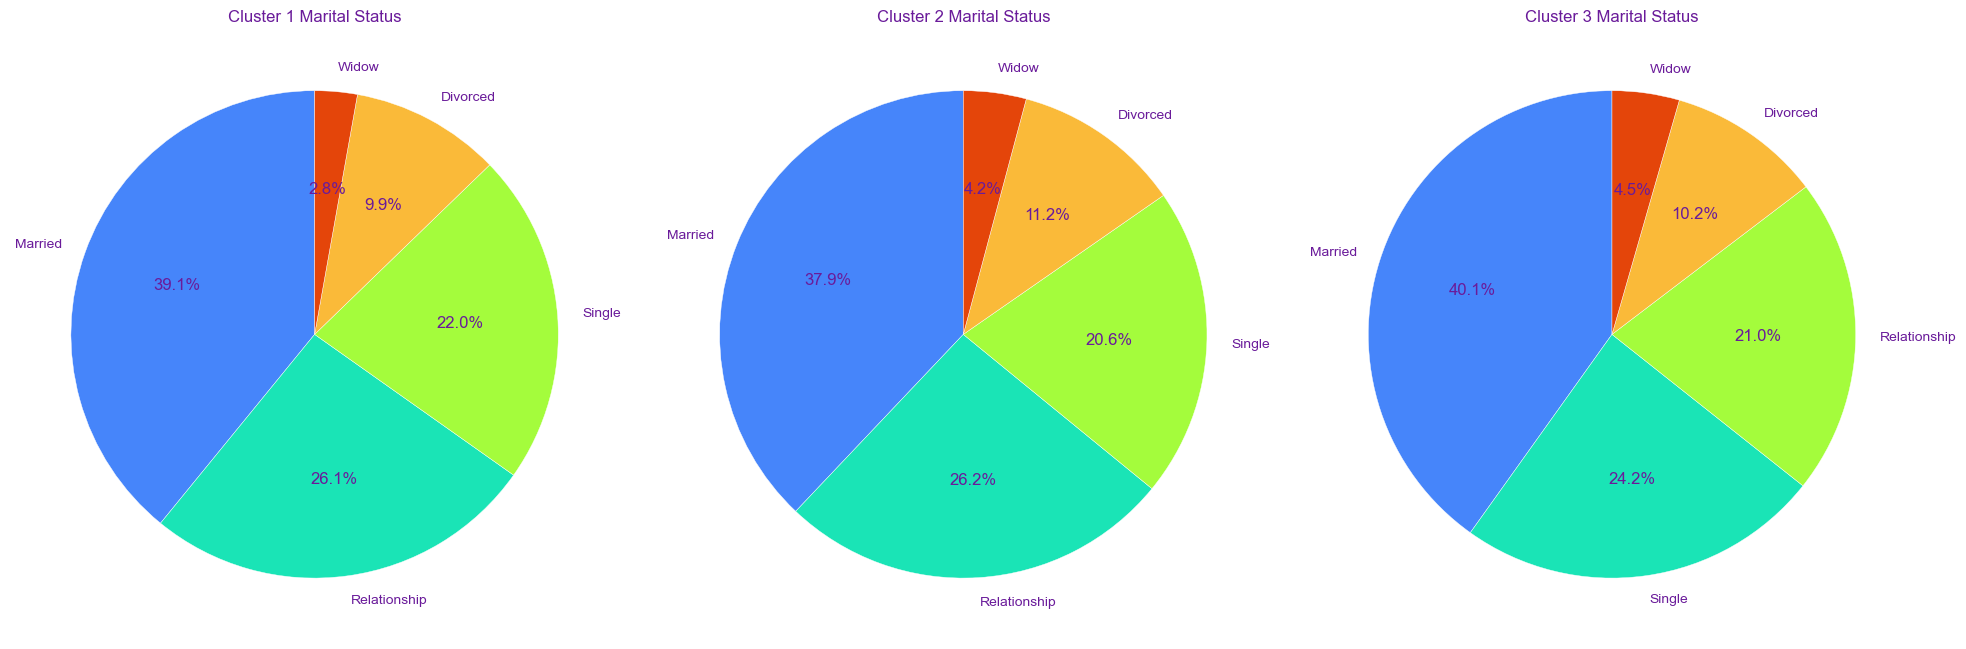

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

# Pilihan warna mencolok
color_palette = ['#FF4500', '#00CED1', '#FFD700', '#8A2BE2', '#32CD32', '#DC143C']

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    cluster_counts = cluster_df['Marital_Status'].value_counts()
    ax.pie(cluster_counts, 
           labels=cluster_counts.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=sns.color_palette("turbo", len(cluster_counts)))  # Warna lebih mencolok
    ax.set_title(f'Cluster {i+1} Marital Status')

plt.tight_layout()

# Matikan sumbu yang tidak terpakai jika jumlah cluster lebih sedikit dari jumlah subplot
if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()



### - Perbandingan Tempat Belanja tiap Cluster

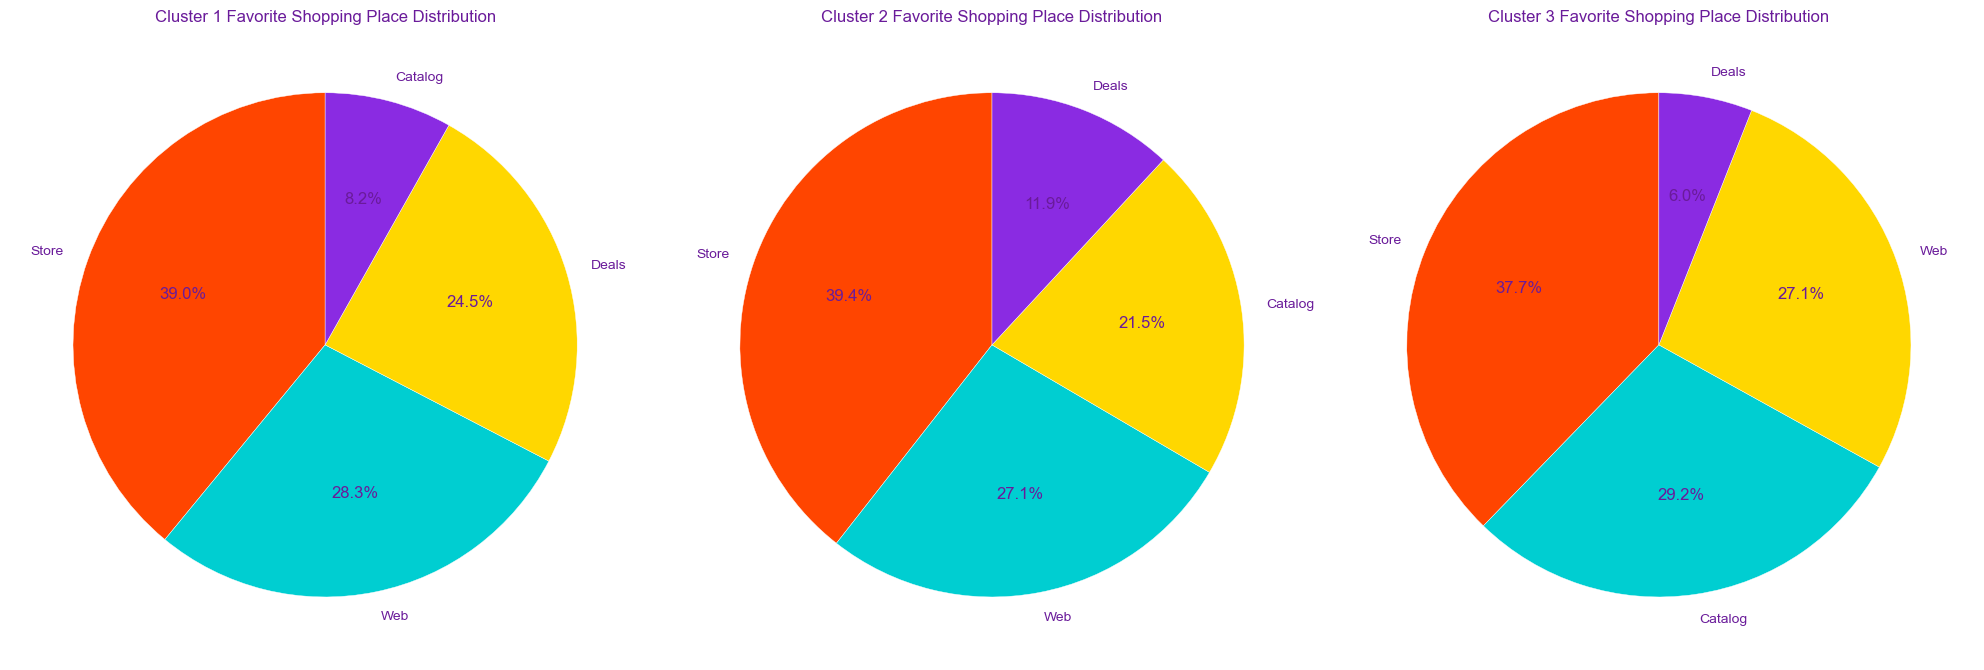

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

# Warna lebih mencolok
color_palette = ['#FF4500', '#00CED1', '#FFD700', '#8A2BE2']  # Warna oranye, biru cerah, emas, ungu

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    numPurchase_per_place = cluster_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
    numPurchase_per_place.index = ['Deals', 'Web', 'Catalog', 'Store']
    numPurchase_per_place = numPurchase_per_place.sort_values(ascending=False)
    
    ax.pie(numPurchase_per_place, 
           labels=numPurchase_per_place.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=color_palette)  # Menggunakan warna mencolok
    
    ax.set_title(f'Cluster {i+1} Favorite Shopping Place Distribution')

plt.tight_layout()

# Matikan subplot yang tidak digunakan jika jumlah cluster lebih sedikit dari jumlah subplot
if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


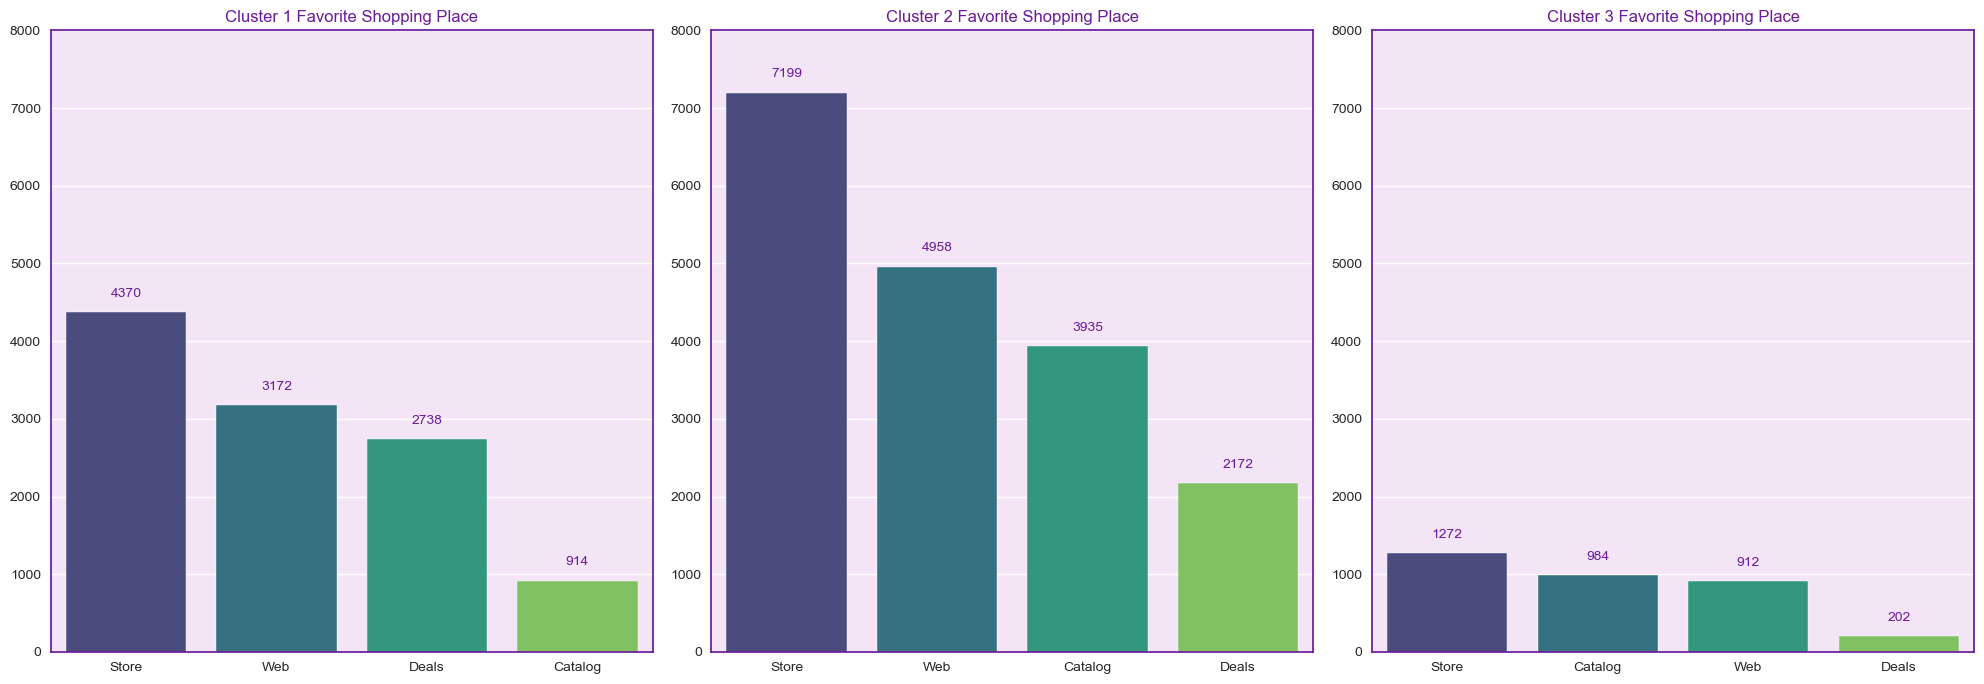

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    numPurchase_per_place = cluster_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
    numPurchase_per_place.index = ['Deals', 'Web', 'Catalog', 'Store']
    numPurchase_per_place = numPurchase_per_place.sort_values(ascending=False)

    # Perbaikan: Menghapus hue karena tidak diperlukan di sini
    bars = sns.barplot(
        x=numPurchase_per_place.index,
        y=numPurchase_per_place.values,  # Gunakan .values agar hanya nilai yang digunakan
        palette='viridis',
        ax=ax
    )
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim(0, 8000)
    ax.set_title(f'Cluster {i+1} Favorite Shopping Place')

    for bar in bars.patches:
        bar_value = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_value + 8000 * 0.02,
            f'{bar_value:.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


### - Perbandingan Produk yang Sering Dibeli tiap Cluster

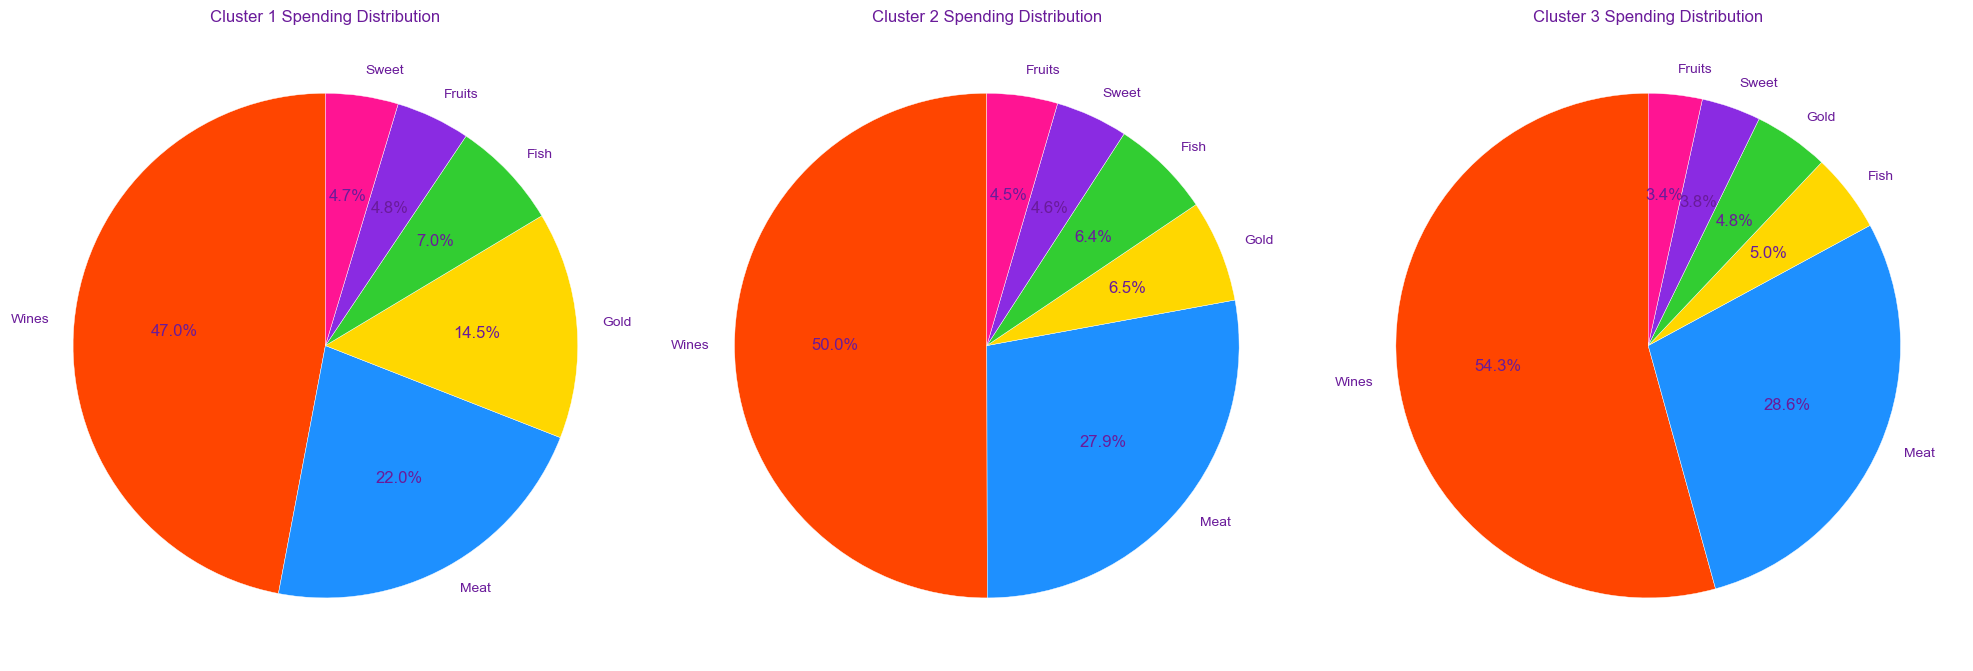

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

# Warna yang lebih cerah dan mencolok
color_palette = ['#FF4500', '#1E90FF', '#FFD700', '#32CD32', '#8A2BE2', '#FF1493']  # Oranye, biru, emas, hijau, ungu, pink

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    total_spending = cluster_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
    total_spending.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    total_spending = total_spending.sort_values(ascending=False)
    
    ax.pie(total_spending, 
           labels=total_spending.index, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=color_palette)  # Warna lebih terang
    
    ax.set_title(f'Cluster {i+1} Spending Distribution')

plt.tight_layout()

# Matikan subplot yang tidak digunakan jika jumlah cluster lebih sedikit dari jumlah subplot
if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


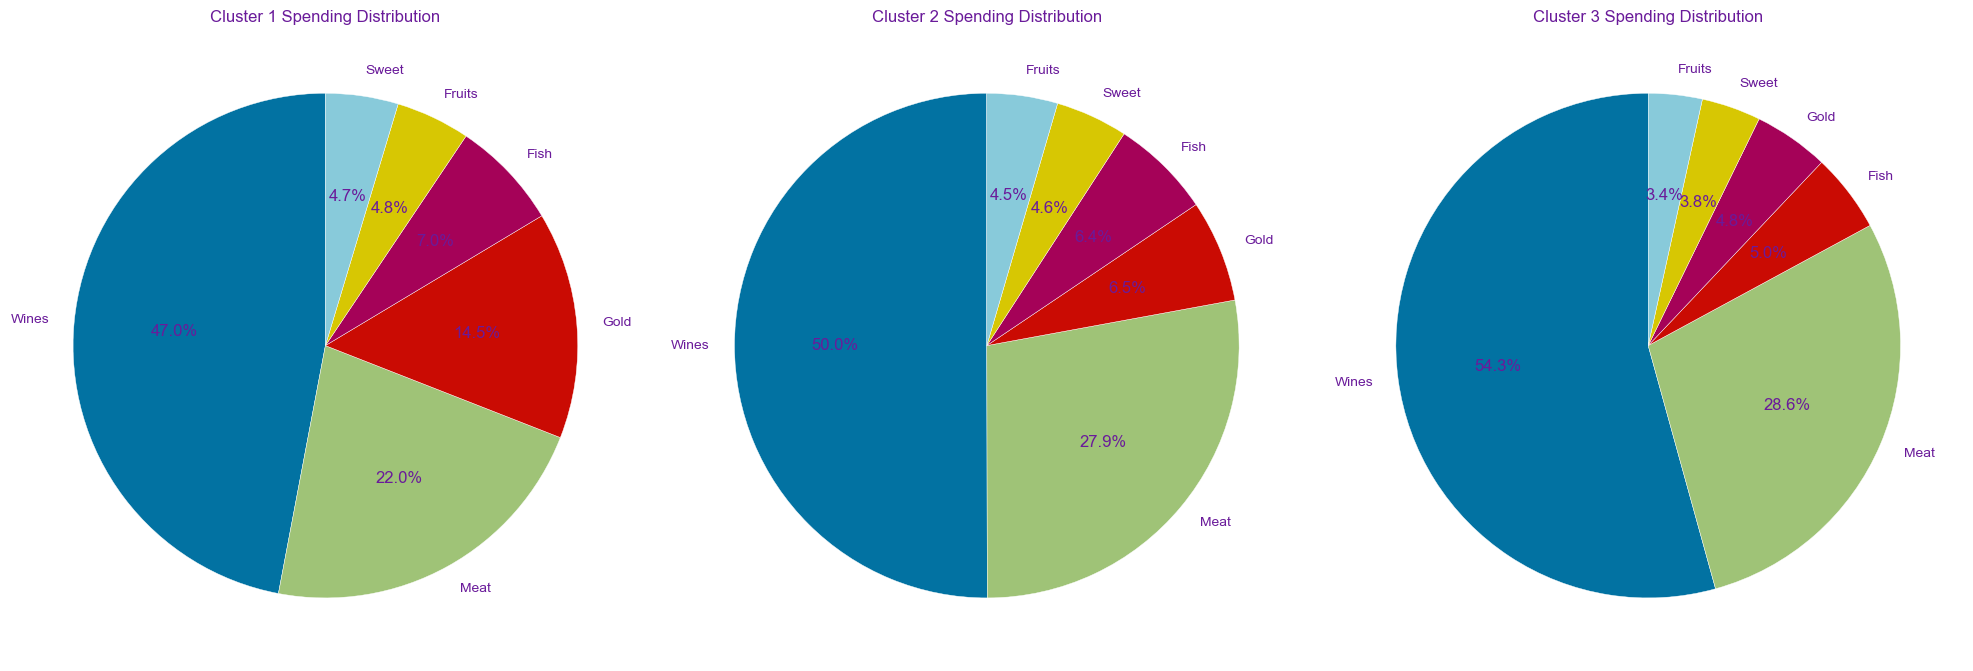

In [211]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    total_spending = cluster_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
    total_spending.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    total_spending = total_spending.sort_values(ascending=False)
    ax.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1} Spending Distribution')

plt.tight_layout()

if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


### Hasil Interpretasi



1. **Cluster 1**:
   - Memiliki pendapatan rendah, berkisar antara `$1,730 - $71,322` dengan rata-rata `$36,488`.
   - Melakukan pengeluaran rendah, yaitu `$5 - $835` dengan rata-rata sekitar `$144.97`.
   - Frekuensi pembelian rendah, antara 0 - 25 kali dengan rata-rata 9 kali per pelanggan.
   - Jumlah anak bervariasi antara 0 - 3, dengan mayoritas memiliki 1 - 2 anak.
   - Status pernikahan sebagian besar adalah Married (Menikah) dan Relationship (Berkomitmen).

2. **Cluster 2**:
   - Memiliki pendapatan menengah, yaitu `$2,447 - $113,734` dengan rata-rata `$67,879`.
   - Melakukan pengeluaran menengah, sekitar `$277 - $2,525` dengan rata-rata `$1,078`.
   - Frekuensi pembelian cukup sering, antara 10 - 43 kali dengan rata-rata 21 kali per pelanggan.
   - Jumlah anak berkisar 0 - 3, dengan mayoritas memiliki 0 - 1 anak.
   - Status pernikahan sebagian besar adalah Married (Menikah) dan Relationship (Berkomitmen).

3. **Cluster 3**:
   - Memiliki pendapatan tinggi, yaitu `$48,192 - $105,471` dengan rata-rata `$80,878`.
   - Melakukan pengeluaran tinggi, sekitar `$416 - $2,525` dengan rata-rata `$1,630`.
   - Frekuensi pembelian sering, antara 12 - 34 kali dengan rata-rata 21 kali per pelanggan.
   - Mayoritas pelanggan tidak memiliki anak.
   - Status pernikahan sebagian besar adalah Married (Menikah) dan Single (Lajang).

**Tambahan**:
- Pelanggan pada **Cluster 1** merupakan yang paling aktif mengakses website.
- Pelanggan pada **Cluster 3** lebih memilih berbelanja melalui Catalog daripada Website. 



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [152]:
df_clustered.to_csv("clustered.csv", index=False)